In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sklearn
from random import randrange
from PIL import Image
import os
import random
from sklearn.decomposition import TruncatedSVD #importing just to do truncatedSVD for me, I didn't have the time(and energy :) ) to implement by myself.

In [9]:
##k-Cross_validation_split:
def cross_validation_split(dataset,k):
    k_folds = list()
    copy_data = list(dataset)
    fold_size = int(len(dataset)/k)
    
    for i in range(k):
        fold = list()
        for j in range(fold_size):
            fold.append(copy_data.pop(randrange(len(copy_data))))
        k_folds.append(fold)
    return k_folds    

In [193]:
data = pd.read_csv('health_data.csv')
data.head()

age  restbps  chol  category
0   26      109   243         0
1   27      106   156         0
2   28      107   225         0
3   27      105   277         0
4   30       96   221         0

In [194]:
X = data.to_numpy()[:, :3]
Y = data.to_numpy()[:, 3]
split = 0.8 #using 70:30 split, random each time
train_samples = np.random.choice(X.shape[0], int(split*X.shape[0]))
test_samples = np.array([i for i in range(X.shape[0]) if i not in list(train_samples)])

X_train = X[[train_samples]]
Y_train = Y[[train_samples]]

X_test = X[[test_samples]]
Y_test = Y[[test_samples]]

X_0 = X_train[Y_train == 0]
X_1 = X_train[Y_train == 1]

X_test_0 = X_test[Y_test == 0]
X_test_1 = X_test[Y_test==1]
print(X_test.shape)

(301, 3)


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  

In [195]:
X_00 = data[data['category'] == 0].to_numpy()[:, :3]
X_11 = data[data['category'] == 1].to_numpy()[:, :3]

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


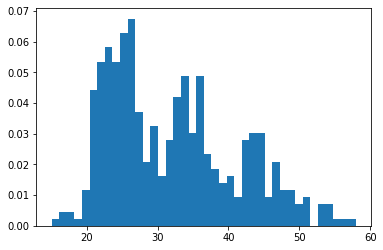

In [5]:
hist1 = plt.hist(X_00[:, 0], bins=40, normed=True)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


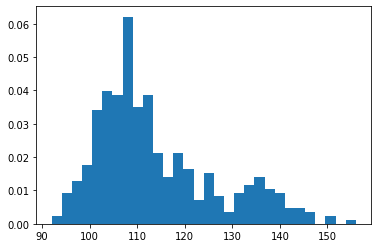

In [6]:
hist2 = plt.hist(X_00[:, 1], bins=30, normed=True)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


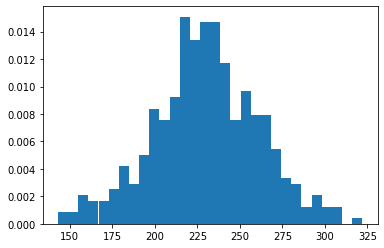

In [7]:
hist3 = plt.hist(X_00[:, 2], bins=30, normed=True)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


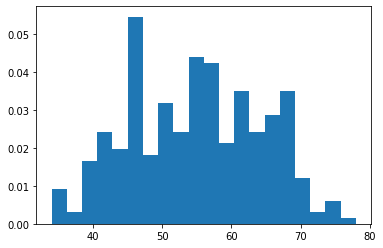

In [8]:
hist11 = plt.hist(X_11[:, 0], bins=20, normed=True)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


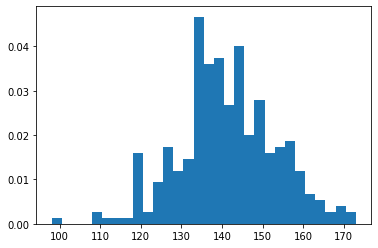

In [9]:
hist12 = plt.hist(X_11[:, 1], bins=30, normed=True)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


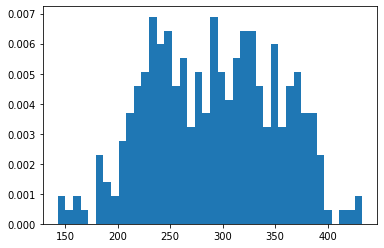

In [10]:
hist13 = plt.hist(X_11[:, 2], bins=40, normed=True)

In [10]:
#Hypercube_Kernel
def hypercube_kernel(h, x, x_i):
    assert (x.shape == x_i.shape)
    return (x - x_i) / (h)


#Window_function   
def parzen_window_func(x_vec):
    for row in x_vec:
        if np.abs(row) > (1/2):
            return 0
        return 1

#Estimation
def parzen_estimation_for_hyper_cube(x_samples, point_x, h, d):
    dimensions = x_samples.shape[1]
    assert (len(point_x) == dimensions)
    k_n = 0
    for row in x_samples:
        x_i = hypercube_kernel(h=h, x=point_x, x_i=row)
        k_n += parzen_window_func(x_i)
    return (k_n / len(x_samples)) / (h**d)

In [197]:
def pdf_multivariate_gauss(x, mu, cov):
    assert(mu.shape[0] > mu.shape[1])
    assert(x.shape[0] > x.shape[1])
    assert(cov.shape[0] == cov.shape[1])
    assert(mu.shape[0] == cov.shape[0])
    assert(mu.shape[0] == x.shape[0])
    part1 = 1 / ( ((2* np.pi)**(len(mu)/2)) * (np.linalg.det(cov)**(1/2)) )
    part2 = (-1/2) * ((x-mu).T.dot(np.linalg.inv(cov))).dot((x-mu))
    return float(part1 * np.exp(part2))

In [233]:
#Gaussian_kernel_and_window_function
def gaussian_window_function(cov, x, x_i):
    #print(cov.shape)
    assert (x.shape == x_i.shape)
    assert(cov.shape[0] == cov.shape[1])
    assert(x_i.shape[0] == cov.shape[0])
    return pdf_multivariate_gauss(x, x_i,cov)


#Estimation
def parzen_estimation_for_gaussian(x_samples, point_x, cov):
    point_x = point_x.reshape((3,1))
    prob = 0.0
    for row in x_samples:
        row = row.reshape((3,1))
        prob += gaussian_window_function(cov,point_x,row)
    return prob 

In [199]:
#prior calculation
P = [float(len(X_0))/ float(len(X_0) + len(X_1)) ,float(len(X_1))/ float(len(X_0) + len(X_1)) ]
P

[0.5625, 0.4375]

# Hyper_Cube

In [238]:
#calculation of posterior
def posterior(X_train_0,X_train_1, data, P,h,d):
    prob = np.zeros(no_of_classes, dtype = np.float64)
    class_probabilities = [parzen_estimation_for_hyper_cube(X_train_0, data, h, d), parzen_estimation_for_hyper_cube(X_train_1, data, h, d)]
    
    #print(probabilities)
    for i in range(2):
        prob[i] = class_probabilities[i]*P[i]
    return prob

In [239]:
def prediction(data, X_train_0, X_train_1,P, h, Th):
    Probabilities = posterior(X_train_0, X_train_1, data, P, h, X_train.shape[1])
    Probabilities = Probabilities/sum(Probabilities)
    #print(Probabilities)
    if Probabilities[1] > Th:
        return 1
    else:
        return 0

In [202]:
#computing accuracy on test data.
C = np.zeros((2,2)) #[[]]
for i in range((X_test_0.shape[0])):
    y_pred = prediction(X_test_0[i], X_0,X_1, P, 1, 0.5)
    C[y_pred, 0] += 1
for i in range((X_test_1.shape[0])):
    y_pred = prediction(X_test_1[i], X_0, X_1, P, 1, 0.5)
    C[y_pred, 1] += 1

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [203]:
C

array([[136.,  21.],
       [ 38., 106.]])

In [204]:
acc = (C[0,0] + C[1,1])/np.sum(C)
print(acc)

0.8039867109634552


In [205]:
precision = (C[1,1])/(C[1,0] + C[1,1])
precision

0.7361111111111112

In [206]:
Recall = (C[1,1])/(C[0,1] + C[1,1])
Recall

0.8346456692913385


100%|██████████| 100/100 [01:10<00:00,  1.42it/s]


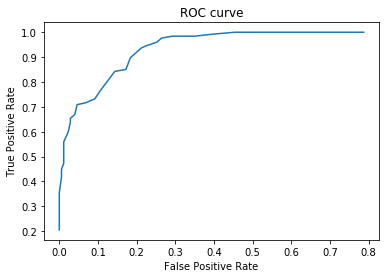

In [240]:
from tqdm import tqdm
TP = []
FP = []
accuracy = []
precision = []
recall = []
f1_score = []
no_of_classes = 2
no_of_classes = 2
for p0 in tqdm(np.linspace(0.000000001,0.999999999999,100)):
    C = np.zeros((2,2)) #[[]]
    for i in range((X_test_0.shape[0])):
        y_pred = prediction(X_test_0[i], X_0,X_1, P, h, p0)
        C[y_pred, 0] += 1
    for i in range((X_test_1.shape[0])):
        y_pred = prediction(X_test_1[i], X_0, X_1, P, h, p0)
        C[y_pred, 1] += 1
    
    tpr = C[1,1]/(C[1,1] + C[0,1])
    fpr = C[1,0]/(C[1,0] + C[0,0])
    acc = (C[0,0] + C[1,1])/np.sum(C) 
    pr = C[1,1]/(C[1,1] + C[1,0])
    rec = C[1,1]/(C[1,1] + C[0,1])
    f1 = 2*(pr*rec)/(pr + rec)
    precision.append(pr)
    recall.append(rec)
    f1_score.append(f1)
    accuracy.append(acc)
    TP.append(tpr)
    FP.append(fpr)

plt.plot(FP, TP, '-')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC curve');

In [208]:
from tqdm import tqdm
Precision = []
Recall = []
ACC = []
F1_score = []
ACC_tr = []
for h in tqdm(np.linspace(0.01,10,100)):
    C = np.zeros((2,2)) #[[]]
    for i in range((X_test_0.shape[0])):
        y_pred = prediction(X_test_0[i], X_0,X_1, P, h, 0.5)
        C[y_pred, 0] += 1
    for i in range((X_test_1.shape[0])):
        y_pred = prediction(X_test_1[i], X_0, X_1, P, h, 0.5)
        C[y_pred, 1] += 1
    acc = (C[0,0] + C[1,1])/np.sum(C) 
    pr = C[1,1]/(C[1,1] + C[1,0])
    rec = C[1,1]/(C[1,1] + C[0,1])
    f1 = 2*(pr*rec)/(pr + rec)
    Precision.append(pr)
    Recall.append(rec)
    F1_score.append(f1)
    ACC.append(acc)
    
    
    C1 = np.zeros((2,2))
    for i in range((X_0.shape[0])):
        y_pred1 = prediction(X_0[i], X_0,X_1, P, h, 0.5)
        C1[y_pred, 0] += 1
    for i in range((X_1.shape[0])):
        y_pred1 = prediction(X_1[i], X_0, X_1, P, h, 0.5)
        C1[y_pred, 1] += 1
    acc1 = (C1[0,0] + C1[1,1])/np.sum(C1)    
    ACC_tr.append(acc1)
#plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC curve');


  0%|          | 0/100 [00:00<?, ?it/s]E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until

100%|██████████| 100/100 [03:11<00:00,  1.91s/it]


In [209]:
kk = np.linspace(0.01,10,100)

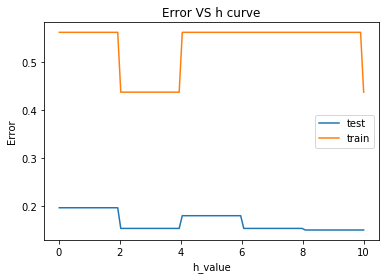

In [211]:
plt.plot(kk[:],np.ones(100) - ACC[:], '-')
plt.plot(kk[:],np.ones(100)- ACC_tr[:], '-')
plt.legend(["test", "train"])
plt.xlabel('h_value'); plt.ylabel('Error'); plt.title('Error VS h curve');

In [215]:
from tqdm import tqdm
Precision1 = []
Recall1 = []
ACC1 = []
F1_score1 = []
ACC_tr1 = []
for h in tqdm(np.linspace(10,20,100)):
    C = np.zeros((2,2)) #[[]]
    for i in range((X_test_0.shape[0])):
        y_pred = prediction(X_test_0[i], X_0,X_1, P, h, 0.5)
        C[y_pred, 0] += 1
    for i in range((X_test_1.shape[0])):
        y_pred = prediction(X_test_1[i], X_0, X_1, P, h, 0.5)
        C[y_pred, 1] += 1
    acc = (C[0,0] + C[1,1])/np.sum(C) 
    pr = C[1,1]/(C[1,1] + C[1,0])
    rec = C[1,1]/(C[1,1] + C[0,1])
    f1 = 2*(pr*rec)/(pr + rec)
    Precision1.append(pr)
    Recall1.append(rec)
    F1_score1.append(f1)
    ACC1.append(acc)
    
    
    C1 = np.zeros((2,2))
    for i in range((X_0.shape[0])):
        y_pred1 = prediction(X_0[i], X_0,X_1, P, h, 0.5)
        C1[y_pred, 0] += 1
    for i in range((X_1.shape[0])):
        y_pred1 = prediction(X_1[i], X_0, X_1, P, h, 0.5)
        C1[y_pred, 1] += 1
    acc1 = (C1[0,0] + C1[1,1])/np.sum(C1)    
    ACC_tr1.append(acc1)
#plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC curve');


100%|██████████| 100/100 [03:11<00:00,  1.92s/it]


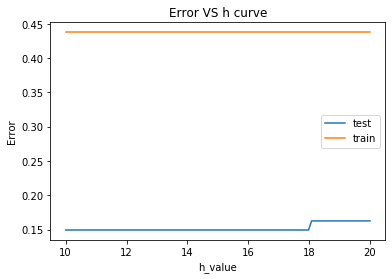

In [216]:
kk1 = np.linspace(10,20,100)
plt.plot(kk1[:],np.ones(100) - ACC1[:], '-')
plt.plot(kk1[:],np.ones(100)- ACC_tr1[:], '-')
plt.legend(["test", "train"])
plt.xlabel('h_value'); plt.ylabel('Error'); plt.title('Error VS h curve');

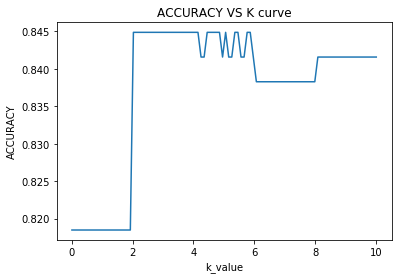

In [54]:
plt.plot(kk ,ACC, '-')
plt.xlabel('k_value'); plt.ylabel('ACCURACY'); plt.title('ACCURACY VS K curve');

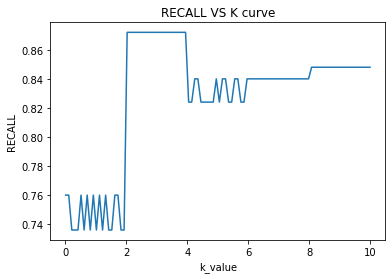

In [55]:
plt.plot(kk, Recall, '-')
plt.xlabel('k_value'); plt.ylabel('RECALL'); plt.title('RECALL VS K curve');

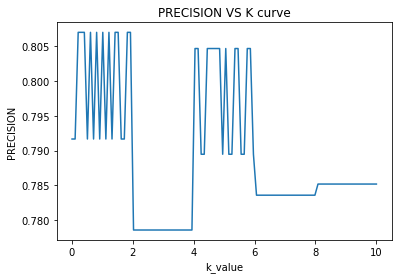

In [56]:
plt.plot(kk, Precision, '-')
plt.xlabel('k_value'); plt.ylabel('PRECISION'); plt.title('PRECISION VS K curve');

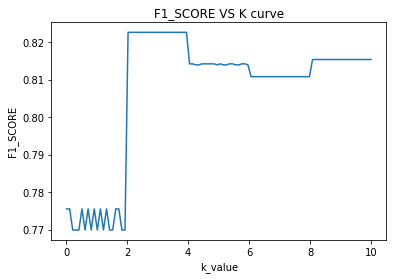

In [57]:
plt.plot(kk, F1_score, '-')
plt.xlabel('k_value'); plt.ylabel('F1_SCORE'); plt.title('F1_SCORE VS K curve');

# Gaussian Window function

In [249]:
#calculation of posterior
def posterior(X_train_0,X_train_1, data, P,cov):
    prob = np.zeros(2, dtype = np.float64)
    class_probabilities = [parzen_estimation_for_gaussian(X_train_0, data,cov ), parzen_estimation_for_gaussian(X_train_1, data,cov)]
    
    #print(probabilities)
    for i in range(2):
        prob[i] = class_probabilities[i]*P[i]
    return prob

In [250]:
def prediction(data, X_train_0, X_train_1,P, cov, Th):
    Probabilities = posterior(X_train_0, X_train_1, data, P, cov)
    Probabilities = Probabilities/sum(Probabilities)
    #print(Probabilities)
    if Probabilities[1] > Th:
        return 1
    else:
        return 0

In [251]:
#computing accuracy on test data.
C = np.zeros((2,2)) #[[]]
cov = np.eye(X_train.shape[1],dtype = np.float)
for i in range((X_test_0.shape[0])):
    y_pred = prediction(X_test_0[i], X_0,X_1, P, cov, 0.5)
    C[y_pred, 0] += 1
for i in range((X_test_1.shape[0])):
    y_pred = prediction(X_test_1[i], X_0, X_1, P, cov, 0.5)
    C[y_pred, 1] += 1

In [252]:
C

array([[132.,  33.],
       [ 42.,  94.]])


100%|██████████| 50/50 [04:02<00:00,  4.85s/it]


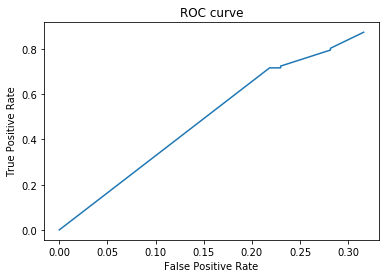

In [253]:
from tqdm import tqdm
TP = []
FP = []
no_of_classes = 2
no_of_classes = 2
for p0 in tqdm(np.linspace(0.000000001,1,50)):
    C = np.zeros((2,2)) #[[]]
    cov = np.eye(3,dtype = np.float)
    for i in range((X_test_0.shape[0])):
        y_pred = prediction(X_test_0[i], X_0,X_1, P, cov, p0)
        C[y_pred, 0] += 1
    for i in range((X_test_1.shape[0])):
        y_pred = prediction(X_test_1[i], X_0, X_1, P, cov, p0)
        C[y_pred, 1] += 1
    
    tpr = C[1,1]/(C[1,1] + C[0,1])
    fpr = C[1,0]/(C[1,0] + C[0,0])
    
    TP.append(tpr)
    FP.append(fpr)

plt.plot(FP, TP, '-')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC curve');

In [235]:
from tqdm import tqdm
Precision = []
Recall = []
ACC = []
F1_score = []
ACC_tr = []
kk = range(1,300)
for h in tqdm(np.linspace(0.01,19,100)):
    C = np.zeros((2,2)) #[[]]
    cov = np.eye(3,dtype = np.float)
    for i in range((X_test_0.shape[0])):
        y_pred = prediction(X_test_0[i], X_0,X_1, P, cov*h, 0.5)
        C[y_pred, 0] += 1
    for i in range((X_test_1.shape[0])):
        y_pred = prediction(X_test_1[i], X_0, X_1, P, cov*h, 0.5)
        C[y_pred, 1] += 1
    acc = (C[0,0] + C[1,1])/np.sum(C) 
    pr = C[1,1]/(C[1,1] + C[1,0])
    rec = C[1,1]/(C[1,1] + C[0,1])
    f1 = 2*(pr*rec)/(pr + rec)
    Precision.append(pr)
    Recall.append(rec)
    F1_score.append(f1)
    ACC.append(acc)
    
    C1 = np.zeros((2,2))
    for i in range((X_0.shape[0])):
        y_pred1 = prediction(X_0[i], X_0,X_1, P, cov*h, 0.5)
        C1[y_pred, 0] += 1
    for i in range((X_1.shape[0])):
        y_pred1 = prediction(X_1[i], X_0, X_1, P, cov*h, 0.5)
        C1[y_pred, 1] += 1
    acc1 = (C1[0,0] + C1[1,1])/np.sum(C1)    
    ACC_tr.append(acc1)


  0%|          | 0/100 [00:00<?, ?it/s]E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until

100%|██████████| 100/100 [25:27<00:00, 15.27s/it]


In [222]:
cov = np.eye(X_train.shape[1],dtype = np.float)*2
cov

array([[2., 0., 0.],
       [0., 2., 0.],
       [0., 0., 2.]])

In [35]:
kk = np.linspace(0.01,30,400)

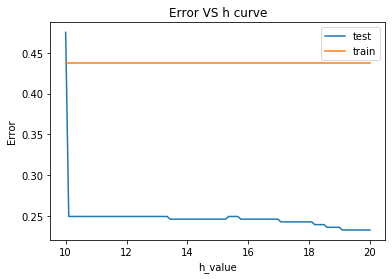

In [236]:
kk = np.linspace(0.01,19,100)
plt.plot(kk1[:],np.ones(100) - ACC[:], '-')
plt.plot(kk1[:],np.ones(100)- ACC_tr[:], '-')
plt.legend(["test", "train"])
plt.xlabel('h_value'); plt.ylabel('Error'); plt.title('Error VS h curve');

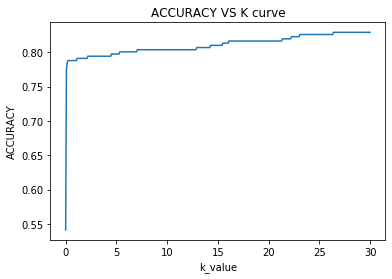

In [36]:
plt.plot(kk ,ACC, '-')
plt.xlabel('k_value'); plt.ylabel('ACCURACY'); plt.title('ACCURACY VS K curve');

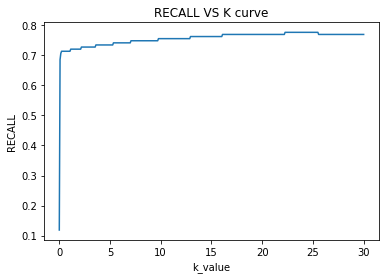

In [37]:
plt.plot(kk, Recall, '-')
plt.xlabel('k_value'); plt.ylabel('RECALL'); plt.title('RECALL VS K curve');

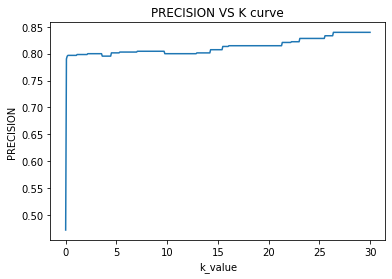

In [38]:
plt.plot(kk, Precision, '-')
plt.xlabel('k_value'); plt.ylabel('PRECISION'); plt.title('PRECISION VS K curve');

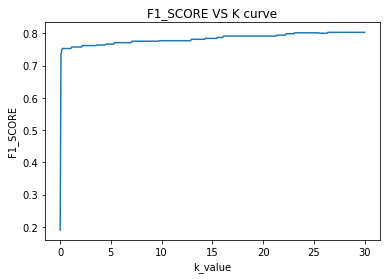

In [39]:
plt.plot(kk, F1_score, '-')
plt.xlabel('k_value'); plt.ylabel('F1_SCORE'); plt.title('F1_SCORE VS K curve');

In [40]:
print(ACC[-1])

0.8291139240506329


In [41]:
print(F1_score[-1])

0.8029197080291971


In [42]:
print(Precision[-1])

0.8396946564885496


In [43]:
print(Recall[-1])

0.7692307692307693


## Question3

In [11]:
import os
IMAGE_PATH = './Medical_MNIST'
print(os.path.abspath(IMAGE_PATH))
n_components = 20

C:\Users\rockt\Assignment1_git\ELL409_Assignment1\Medical_MNIST


In [12]:
#data_loader
#!DEL *.npz
from tqdm import tqdm
split = 0.7 #using 70:30 split, random each time
def data_loader():
    X = []
    Y = []
    X_test = []
    Y_test = []
    
    i = 0
    for folder in os.listdir(os.path.abspath(IMAGE_PATH)):
        IMAGE_DIR = os.path.join(IMAGE_PATH, folder)
        print("Reading" + IMAGE_DIR)
        files = os.listdir(IMAGE_DIR)
        random.shuffle(files)
        j=0
        for file in tqdm(files):
            if j < int(len(files)*split):
                X.append((np.asarray(Image.open(os.path.join(IMAGE_DIR, file)))).reshape(-1))
                Y.append(i)
            else:
                X_test.append((np.asarray(Image.open(os.path.join(IMAGE_DIR, file)))).reshape(-1))
                Y_test.append(i)
            j += 1
        
        i += 1
    print('Completed Loading Data. Saving as np file so that can directy load array nexttime')
    np.savez('q3data.npz', X = np.array(X), Y = np.array(Y), X_test=X_test, Y_test = Y_test)
    return np.array(X), np.array(Y), np.array(X_test), np.array(Y_test)

if 'q3data.npz' in os.listdir('./'):
    zfile = np.load('q3data.npz')
    X = zfile['X']
    Y = zfile['Y']
    X_test = zfile['X_test']
    Y_test = zfile['Y_test']
else:
    X, Y, X_test, Y_test = data_loader()

In [13]:
print(f'X.shape = {X.shape}') #oof!
print(f'X_test.shape = {X_test.shape}')

X.shape = (41267, 4096)
X_test.shape = (17687, 4096)


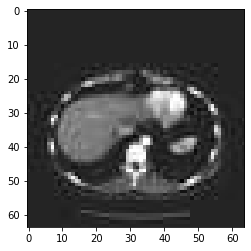

In [14]:
#Visualizing the images.
plt.imshow(X[0].reshape(64, -1), cmap='gray')

In [15]:
#Lets try to do PCA on the input images??
h, w = 64, 64
'''
def pca(X, n_pc):
    n_samples, n_features = X.shape
    mean = np.mean(X, axis=0)
    centered_data = X-mean
    U, S, V = np.linalg.svd(centered_data)
    components = V[:n_pc]
    projected = U[:,:n_pc]*S[:n_pc]
    
    return projected, components, mean, centered_data
    #credits to https://towardsdatascience.com/eigenfaces-recovering-humans-from-ghosts-17606c328184 for helping me write PCA
    #and saving me a few hours.
'''
"""It helps visualising the portraits from the dataset."""
def plot_portraits(images, titles, h, w, n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
'''
n_components = 50
P, C, M, X_centered=pca(X[:1000], n_pc=n_components)
#P->lower dimensional version of X, C-> Eigen vectors with largest eigen values, M->mean image (used in reconstruction)
eigenscans = C.reshape((n_components, h, w))
eigenscan_titles = ["eigenscan %d" % i for i in range(eigenscans.shape[0])]
plot_portraits(eigenscans, eigenscan_titles, h, w, 4, 4) 
'''

'\nn_components = 50\nP, C, M, X_centered=pca(X[:1000], n_pc=n_components)\n#P->lower dimensional version of X, C-> Eigen vectors with largest eigen values, M->mean image (used in reconstruction)\neigenscans = C.reshape((n_components, h, w))\neigenscan_titles = ["eigenscan %d" % i for i in range(eigenscans.shape[0])]\nplot_portraits(eigenscans, eigenscan_titles, h, w, 4, 4) \n'

In [16]:
X_samples = list()
Y_samples = list()
X_samples.append(list(X))
Y_samples.append(list(Y))
X_samples.append(list(X_test))
Y_samples.append(list(Y_test))
X_samples = sum(X_samples, [])
Y_samples = sum(Y_samples, [])
X_samples = np.array(X_samples)
Y_samples = np.array(Y_samples)

In [17]:
def fastpca(X, n_pc):
    n_samples, n_features = X.shape
    mean = np.mean(X, axis=0)
    centered_data = X-mean
    svd = TruncatedSVD(n_components=n_pc, n_iter=7, random_state=42)
    svd.fit(X)
    #U, S, V = np.linalg.svd(centered_data)
    components = svd.components_
    #projected = U[:,:n_pc]*S[:n_pc]
    projected = svd.transform(X)
    return projected, components, mean, centered_data

In [18]:
X_red, C, M, X_centered=fastpca(X_samples, n_pc=n_components)
#X_red->lower dimensional version of X, C-> Eigen vectors with largest eigen values, M->mean image (used in reconstruction)
#eigenscans = C.reshape((n_components, h, w))
#eigenscan_titles = ["eigenscan %d" % i for i in range(eigenscans.shape[0])]
#plot_portraits(eigenscans, eigenscan_titles, h, w, 4, 4) 

In [98]:
from tqdm import tqdm 
def dataset_minmax(dataset):
    minmax = list()
    for i in tqdm(range(len(dataset[0]))):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax

In [99]:
def normalize_dataset(dataset, minmax):
    for row in tqdm(dataset):
        for i in tqdm(range(len(row))):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

In [100]:
minmax = dataset_minmax(X_red)


100%|██████████| 20/20 [00:00<00:00, 35.12it/s]


In [101]:
ii = minmax[0]
ii

[492.00395228444387, 13034.680414462264]

In [102]:
normalize_dataset(X_red, minmax)


  0%|          | 0/58954 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A

  0%|          | 1/58954 [00:00<1:41:55,  9.64it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20082.85it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<00:00, 20237.90it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20174.62it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20039.68it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

  1%|          

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20068.44it/s]


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 19854.69it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A

  2%|▏         | 1330/58954 [00:04<03:03, 314.20it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20034.89it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20097.29it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20015.77it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20034.89it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 19925.43it/s]


100%|██████████| 20/20 [00:00<00:00, 20034.89it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 19222.29it/s]

  3%|▎         | 1994/58954 [00:06<03:09, 299.86it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20198.91it/s]


100%|██████████| 20/2

100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20247.67it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?

  4%|▍         | 2636/58954 [00:07<02:44, 342.22it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20068.44it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

  5%|▌         | 2986/58954 [00:08<02:24, 387.97it/s]

100%|████████

  6%|▌         | 3294/58954 [00:09<02:33, 362.64it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20164.92it/s]


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20194.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20326.16it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 19831.22it/s]


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<00:00, 6686.28it/s]


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 19770.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20073.24it/s]

  8%|▊         | 4582/58954 [00:13<02:45, 328.98it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%

100%|██████████| 20/20 [00:00<00:00, 20078.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20753.61it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

  9%|▉         | 5232/58954 [00:15<02:52, 310.58it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 19873.51it/s]


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20092.47it/s]


100%|██████████| 20/20 [00:00<00:00, 20078.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20082.85it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 10061.90it/s]


100%|██████████| 20/20

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 4011.38it/s]

 11%|█         | 6559/58954 [00:19<02:38, 331.02it/s]

100%|██████████| 20/20 [00:00<00:00, 6686.28it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 

100%|██████████| 20/20 [00:00<00:00, 20082.85it/s]


100%|██████████| 20/20 [00:00<00:00, 20208.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 12%|█▏        | 6896/58954 [00:20<02:47, 310.22it/s]

100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20030.11it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A

 12%|█▏        | 7210/58954 [00:21<02:54, 296.44it/s]

100%|██████████| 20/20 [00:00<00:00, 20068.44it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20073.24it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20145.55it/s]


100%|██████████| 20/2

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20073.24it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<00:00, 10037.82it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 5012.61it/s]

 13%|█▎        | 7911/58954 [00:24<02:45, 308.56it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20370.59it/s]


100%|██████████| 20/20 [00:00<00:00, 19784.45it/s]


100%|████████

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 14%|█▍        | 8238/58954 [00:25<02:26, 345.60it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|████████

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20068.44it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 10025.83it/s]


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|████████

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20106.92it/s]


100%|██████████| 20/20 [00:00<00:00, 19925.43it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 16%|█▌        | 9217/58954 [00:28<02:41, 308.46it/s]

100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<00:00, 20068.44it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20247.67it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|███████

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20068.44it/s]


100%|██████████| 20/20 [00:00<00:00, 20030.11it/s]


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 19991.92it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 17%|█▋        | 9871/58954 [00:29<02:20, 349.33it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20073.24it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 17%|█▋        | 10200/58954 [00:30<02:19, 349.12it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100

100%|██████████| 20/20 [00:00<00:00, 20006.22it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]

 18%|█▊        | 10869/58954 [00:32<02:15, 354.59it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20068.44it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 10025.83it/s]


100%|██████████| 20/

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]

 19%|█▉        | 11201/58954 [00:33<01:58, 401.83it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00

100%|██████████| 20/20 [00:00<00:00, 20150.39it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 20%|█▉        | 11528/58954 [00:34<02:04, 379.84it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 19859.39it/s]


100%|██████████| 20/20 [00:00<00:00, 20034.89it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]

 21%|██        | 12254/58954 [00:36<02:25, 320.36it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<00:00, 6685.22it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20039.68it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20078.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20034.89it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 6684.15it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]

 21%|██▏       | 12598/5

100%|██████████| 20/20 [00:00<00:00, 19987.15it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20073.24it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 19845.30it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 19873.51it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 24%|██▍       | 14044/58954 [00:41<02:14, 332.92it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 6685.75it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20073.24it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 10027.02it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 5018.31it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|█████████

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20073.24it/s]


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<00:00, 20034.89it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20

100%|██████████| 20/20 [00:00<00:00, 20039.68it/s]


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 27%|██▋       | 15640/58954 [00:46<02:08, 337.46it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20068.44it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 27%|██▋       | 15961/58954 [00:47<01:59, 359.00it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 19779.79it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 10029.42it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20030.11it/s]


100%|██████████| 20/20 [00:00<?, ?it/s

100%|██████████| 20/20 [00:00<00:00, 20034.89it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 28%|██▊       | 16296/58954 [00:48<02:12, 321.96it/s]

100%|██████████| 20/20 [00:00<00:00, 20068.44it/s]


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 28%|██▊       | 16617/58954 [00:49<02:02, 345.03it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20111.74it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20025.32it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20030.11it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 10027.02it/s]


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<00:00, 20034.89it/s]


100%|██████████| 20/20 [00:00<00:00, 20039.68it/s]


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 19968.12it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s

100%|██████████| 20/20 [00:00<00:00, 20073.24it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 19835.91it/s]


100%|██████████| 20/20 [00:00<00:00, 20068.44it/s]


100%|██████████| 20/20 [00:00<00:00, 20092.47it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][

100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20257.45it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]

 33%|███▎      | 19269/58954 [00:58<02:06, 313.28it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 33%|███▎      | 19597/58954 [00:59<02:03, 318.24it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20030.11it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 19911.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 34%|███▍      | 19923/58954 [01:00<02:01, 320.29it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100

100%|██████████| 20/20 [00:00<00:00, 19958.62it/s]


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 19977.63it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 34%|███▍      | 20254/58954 [01:01<02:02, 316.55it/s]

100%|██████████| 20/20 [00:00<00:00, 20116.57it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20010.99it/s]


100%|██████████| 20/20 [00:00<00:00, 20078.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 36%|███▌      | 21282/58954 [01:04<02:01, 309.94it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 37%|███▋      | 21613/58954 [01:05<01:55, 323.85it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20030.11it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20097.29it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20025.32it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 19882.93it/s]


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A

 39%|███▉      | 22943/58954 [01:10<01:56, 307.99it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20073.24it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?

 40%|████      | 23591/58954 [01:11<01:38, 357.69it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20020.54it/s]


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20030.11it/s]


100%|██████████| 20/20 [00:0



100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 6680.96it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20068.44it/s]


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<00:00, 20213.51it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 42%|████▏     | 24635/58954 [01:15<02:29, 229.89it/s]

100%|██████████| 20/20 [00:00<00:00, 10028.22it/s]


100%|██████████| 20/20 [00:00<00:00, 20087.66it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<00:00, 10025.83it/s]


100%|██████████| 20/20 [00:00<?, ?it/

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 42%|████▏     | 24947/58954 [01:16<02:32, 223.03it/s]

100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20068.44it/s]


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20039.68it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████

100%|██████████| 20/20 [00:00<00:00, 20068.44it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20068.44it/s]


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 43%|████▎     | 25276/58954 [01:18<02:32, 220.55it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


10

100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<00:00, 20034.89it/s]


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<00:00, 20025.32it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 43%|████▎     | 25589/58954 [01:19<02:31, 219.63it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20068.44it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20078.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<00:00, 20039.68i

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<00:00, 10024.63it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20030.11it/s]

 45%|████▌     | 26554/58954 [01:23<02:29, 216.62it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


10

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20025.32it/s]


100%|██████████| 20/20 [00:00<00:00, 20039.68it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 2506.76it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]

 46%|████▌     | 26870/58954 [01:25<03:01, 176.91it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 6688.95it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|████████

100%|██████████| 20/20 [00:00<00:00, 10042.63it/s]


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20126.22it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]

 46%|████▌     | 27187/58954 [01:26<01:52, 283.48it/s]

100%|██████████| 20/20 [00:00<00:00, 20073.24it/s]


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 19925.43it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 10023.43it/s]


100%|██████████| 20/20 [00:0

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20073.24it/s]


100%|█████████

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 48%|████▊     | 28482/58954 [01:31<01:31, 331.23it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 5016.81it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 10027.02it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/2

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20034.89it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]

 49%|████▉     | 28819/58954 [01:32<01:33, 322.15it/s]

100%|██████████| 20/20 [00:00<00:00, 20034.89it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20092.47it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<00:00, 20001.45it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 6686.81it/s]


100%|██████████| 20/20 

100%|██████████| 20/20 [00:00<?, ?it/s][A

 51%|█████     | 30048/58954 [01:36<01:34, 304.45it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20087.66it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 2

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 52%|█████▏    | 30388/58954 [01:36<01:14, 381.07it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|███████

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20039.68it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|█████████

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20025.32it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 52%|█████▏    | 30894/58954 [01:38<01:23, 335.79it/s]

100%|██████████| 20/20 [00:00<00:00, 2

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A

 54%|█████▍    | 31861/58954 [01:41<01:35, 283.75it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20020.54it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 10025.83it/s]


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20039.68it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 19982.39it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|████████

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]

 55%|█████▌    | 32512/58954 [01:43<01:26, 304.12it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00

100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20092.47it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]

 56%|█████▌    | 32843/58954 [01:44<01:25, 306.16it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


10

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20039.68it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|█████████

100%|██████████| 20/20 [00:00<00:00, 20155.23it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 10030.62it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 58%|█████▊    | 33961/58954 [01:48<01:12, 344.68it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/

100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]

 58%|█████▊    | 34272/58954 [01:49<01:17, 318.43it/s]

100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 19968.12it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<00:00, 20034.89it/s]


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20073.24it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20078.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A

 59%|█████▊    | 34599/58954 [01:50<01:16, 320.00it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20030.11it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20025.32it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20039.68it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20121.39it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 61%|██████    | 35746/58954 [01:54<01:02, 371.63it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20039.68it/s]

 61%|██████    | 36074/58954 [01:55<01:11, 321.02it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|█████████

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20039.68it/s]


100%|██████████| 20/20 [00:00<00:00, 20025.32it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20078.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20039.68it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A

 64%|██████▎   | 37532/58954 [02:00<01:13, 292.19it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20082.85it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20087.66it/s]


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20030.11it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20039.68it/s]


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<00:00, 20068.44it/s]


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<00:00, 20106.92it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20073.24it/s]


100%|██████████| 20/20 [00:00<00:00, 20073.24it/s]


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<00:00, 20039.68it/s]


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<00:00, 20039.68it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 65%|██████▍   | 38177/58954 [02:02<01:46, 194.5

100%|██████████| 20/20 [00:00<00:00, 20073.24it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20073.24it/s]


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20039.68it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A

 66%|██████▋   | 39175/58954 [02:07<01:24, 235.12it/s]

100%|██████████| 20/20 [00:00<00:00, 20025.32it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20039.68it/s]


100%|██████████| 20/20 [00:00<?, ?it/

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 6684.68it/s]


100%|██████████| 20/20 [00:00<00:00, 20025.32it/s]


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 67%|██████▋   | 39499/58954 [02:08<01:16, 254.67it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 68%|██████▊   | 39813/58954 [02:09<01:02, 306.17it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20006.22it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 19982.39it/s]


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 68%|██████▊   | 40150/58954 [02:10<00:59, 313.89it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 6690.01it/s]


100%|██████████| 20/20 [00:00<00:00, 10029.42it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<00:00, 20073.24it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00

100%|██████████| 20/20 [00:00<00:00, 20020.54it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20277.03it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]

 71%|███████   | 41655/58954 [02:15<01:00, 288.24it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20078.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20034.89it/s]


100%|██████████| 20/20 [00:00<?, ?it/s

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20135.88it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 73%|███████▎  | 42758/58954 [02:19<00:51, 316.88i

100%|██████████| 20/20 [00:00<00:00, 19845.30it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20039.68it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20034.89it/s]

 74%|███████▍  | 43728/58954 [02:22<00:47, 319.41it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 19882.93it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|█████████

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20223.26it/s]


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<00:00, 20034.89it/s]


100%

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20068.44it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A

 77%|███████▋  | 45415/58954 [02:27<00:44, 305.90it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


10

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 78%|███████▊  | 46261/58954 [02:30<00:45, 281.25it/s]

100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/

100%|██████████| 20/20 [00:00<00:00, 20068.44it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20039.68it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20039.68it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A

 79%|███████▉  | 46585/58954 [02:32<00:51, 241.07it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 10027.02it/s]


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:0

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<00:00, 20311.40it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 80%|███████▉  | 46901/58954 [02:33<01:02, 193.05it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20010.99it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20078.05it/s]


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20039.68it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


10

100%|██████████| 20/20 [00:00<00:00, 20073.24it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 80%|████████  | 47209/58954 [02:35<00:59, 196.93it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20039.68it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20068.44it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20039.68it/s]


10

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|█████████

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20030.11it/s]


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 82%|████████▏ | 48587/58954 [02:40<00:30, 337.70it/s]

100%|██████████| 20/20 [00:00<00:00, 20174.62it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20039.68it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20073.24it/s]


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 83%|████████▎ | 48928/58954 [02:41<00:30, 327.51it/s]

100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████

 85%|████████▍ | 49934/58954 [02:45<00:32, 277.63it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20010.99it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20078.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20039.68it/s]


100%|██████████| 20/20 [00:00<?, ?it/

100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20039.68it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A

 85%|████████▌ | 50276/58954 [02:46<00:28, 304.98it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20068.44it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20015.77it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|█████████

100%|██████████| 20/20 [00:00<00:00, 20068.44it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20039.68it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 86%|█

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]

 88%|████████▊ | 51730/58954 [02:51<00:20, 345.83it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 19968.12it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<00:00, 20092.47it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 19968.12it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 88%|████████▊ | 52053/58954 [02:51<00:19, 355.55it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20034.89it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20034.89it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20

 89%|████████▉ | 52698/58954 [02:53<00:20, 306.50it/s]

100%|██████████| 20/20 [00:00<00:00, 20073.24it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20068.44it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<00:00, 20034.89it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<00:00, 20131.05it/s]


100%|██████████| 20/20 [00:00<00:00, 20006.22it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|████

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20073.24it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20010.99it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]

 91%|█████████ | 53777/58954 [02:57<00:15, 343.94it/s]

100%|██████████| 20/20 [00:00<00:00, 10025.83it/s]


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/

100%|██████████| 20/20 [00:00<?, ?it/s][A

 92%|█████████▏| 54090/58954 [02:58<00:14, 337.39it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 5013.81it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<00:00, 20102.10it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20

 93%|█████████▎| 54648/58954 [03:00<00:13, 308.97it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20078.05it/s]


100%|██████████| 20/20 [00:00<00:00, 20034.89it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


  0%|          | 0/20 [00:00<?, ?it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20082.85it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 19319.69it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A

 94%|█████████▍| 55703/58954 [03:04<00:19, 166.58it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 10033.02it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20020.54it/s]


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<00:00, 20030.11it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


10

100%|██████████| 20/20 [00:00<00:00, 20068.44it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<00:00, 20150.39it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 10022.23it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 96%|█████████▌| 56343/58954 [03:08<00:11, 229.16it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20063.64it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 97%|█████████▋| 57264/58954 [03:12<00:06, 248.16it/s]

100%|██████████| 20/20 [00:00<00:00, 20039.68it/s]


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A

 98%|█████████▊| 57581/58954 [03:13<00:04, 317.46it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|███████

100%|██████████| 20/20 [00:00<00:00, 20054.05it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A

 99%|█████████▊| 58212/58954 [03:15<00:02, 320.74it/s]

100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20049.25it/s]


100%|██████████| 20/20 [00:00<00:00, 20087.66it/s]


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<?, ?it/s][A


100%|██████████| 20/20 [00:00<00:00, 20044.46it/s]


100%|██████████| 20/

In [103]:
minmax = dataset_minmax(X_red)


100%|██████████| 20/20 [00:00<00:00, 28.30it/s]


In [104]:
ii = minmax[0]
ii

[0.0, 1.0]

In [19]:
Y_samples = Y_samples.reshape((58954,1))

In [20]:
X_final = np.append(X_red, Y_samples, axis = 1)
X_final.shape

(58954, 21)

In [21]:
no_of_classes = 6

In [22]:
def separate(X, no_of_classes):
    data = dict()
    for i in range(no_of_classes):
        data["X_"+str(i)] = X[X[:,20] == i]
    return data

In [23]:
data = separate(X_final, 6)

In [24]:
def prior_multi_class(X, no_of_classes):
    P = []
    for i in range(no_of_classes):
        X_i = X[X ==i]
        P.append(float(X_i.shape[0]/X.shape[0]))
    return P

# HyperCube

In [25]:
no_of_classes = 6

In [27]:
#calculation of posterior
def posterior(data_train, data, P,h):
    prob = np.zeros(no_of_classes, dtype = np.float64)
    class_probabilities  = np.zeros(no_of_classes)
    features = 20;
    for i in range(no_of_classes):
        X_train = data_train["X_"+str(i)]
        class_probabilities[i] = parzen_estimation_for_hyper_cube(X_train, data, h, features)
    #print(probabilities)
    for i in range(no_of_classes):
        prob[i] = class_probabilities[i]*P[i]
    return prob

In [28]:
def prediction(data, X_train, h):
    Y = X_train[:,20].reshape(X_train.shape[0])
    P = prior_multi_class((Y), no_of_classes)
    data_train = separate(X_train, 6)
    Probabilities = posterior(data_train, data, P, h)
    Probabilities = Probabilities/sum(Probabilities)
    #print(Probabilities)
    return np.argmax(Probabilities)

In [29]:
k_folds = cross_validation_split(X_final, 5)

In [30]:
X_test = k_folds[0]
X_test = np.array(X_test)
print(X_test.shape)

(11790, 21)


In [31]:
X_train = list(k_folds)
#print(ind)
del X_train[0]
X_train = sum(X_train, [])
X_train = np.array(X_train)

In [32]:
X_train_f = X_train[:, :20]
X_test_f = X_test[:,:20]
Y_train_f = X_train[:,20].reshape(X_train.shape[0],1)
Y_test_f = X_test[:,20].reshape(X_test.shape[0],1)

In [33]:
data_test = separate(X_test, no_of_classes)

In [34]:
#computing accuracy on test data.
from tqdm import tqdm
C1 = np.zeros((no_of_classes,no_of_classes)) #[[]]
for cc in tqdm(range(no_of_classes)):
    X_ts = data_test["X_"+str(cc)]
    for i in tqdm(range((X_ts.shape[0]))):
        y_pred = prediction(X_ts[i], X_train, 2)
        C1[y_pred, cc] += 1

  0%|          | 5/1957 [00:00<06:33,  4.96it/s]E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  

  8%|▊         | 150/1957 [00:25<04:57,  6.08it/s]


 15%|█▌        | 301/1957 [00:50<04:40,  5.89it/s]


 23%|██▎       | 452/1957 [01:16<04:16,  5.88it/s]


 31%|███       | 603/1957 [01:42<03:49,  5.90it/s]


 39%|███▊      | 754/1957 [02:07<03:24,  5.88it/s]


 46%|████▌     | 905/1957 [02:33<02:59,  5.85it/s]


 54%|█████▍    | 1055/1957 [02:58<02:35,  5.81it/s]


 61%|██████▏   | 1203/1957 [03:24<02:05,  5.99it/s]


 69%|██████▉   | 1351/1957 [03:51<01:52,  5.40it/s]


 77%|███████▋  | 1499/1957 [04:18<01:22,  5.54it/s]


 84%|████████▍ | 1647/1957 [04:46<00:58,  5.31it/s]


 92%|█████████▏| 1795/1957 [05:13<00:30,  5.38it/s]


 99%|█████████▉| 1943/1957 [05:42<00:02,  5.38it/s]


  8%|▊         | 137/1793 [00:23<04:34,  6.04it/s]


 16%|█▌        | 288/1793 [00:50<04:13,  5.93it/s]


 24%|██▍       | 439/1793 [01:15<03:49,  5.90it/s]


 33%|███▎      | 590/1793 [01:42<03:39,  5.48it/s]


 41%|████▏     | 741/1793 [02:08<02:52,  6.10it/s]


 50%|████▉     | 892/1793 [02:34<02:41,  5.60it/s]


 58%|█████▊    | 1042/1793 [03:00<02:09,  5.82it/s]


 66%|██████▋   | 1190/1793 [03:26<01:52,  5.36it/s]


 75%|███████▍  | 1338/1793 [03:52<01:22,  5.51it/s]


 83%|████████▎ | 1486/1793 [04:19<00:54,  5.68it/s]


 91%|█████████ | 1634/1793 [04:45<00:28,  5.53it/s]


 99%|█████████▉| 1782/1793 [05:11<00:02,  5.40it/s]


  7%|▋         | 140/2038 [00:24<05:26,  5.82it/s]


 14%|█▍        | 291/2038 [00:50<05:03,  5.75it/s]


 22%|██▏       | 442/2038 [01:17<04:35,  5.79it/s]


 29%|██▉       | 593/2038 [01:43<04:15,  5.65it/s]


 37%|███▋      | 744/2038 [02:11<04:05,  5.27it/s]


 44%|████▍     | 895/2038 [02:39<03:34,  5.32it/s]


 51%|█████▏    | 1045/2038 [03:06<02:53,  5.72it/s]


 59%|█████▊    | 1193/2038 [03:33<02:30,  5.60it/s]


 66%|██████▌   | 1341/2038 [04:02<02:19,  5.00it/s]


 73%|███████▎  | 1489/2038 [04:32<01:46,  5.18it/s]


 80%|████████  | 1637/2038 [05:02<01:26,  4.64it/s]


 88%|████████▊ | 1785/2038 [05:27<00:42,  5.98it/s]


 95%|█████████▍| 1933/2038 [05:58<00:27,  3.81it/s]


  2%|▏         | 44/1980 [00:07<05:40,  5.69it/s]


 10%|▉         | 196/1980 [00:35<05:26,  5.47it/s]


 18%|█▊        | 347/1980 [01:02<04:43,  5.77it/s]


 25%|██▌       | 498/1980 [01:29<04:18,  5.74it/s]


 33%|███▎      | 649/1980 [01:56<04:14,  5.24it/s]


 40%|████      | 800/1980 [02:23<03:22,  5.84it/s]


 48%|████▊     | 951/1980 [02:51<03:10,  5.41it/s]


 56%|█████▌    | 1100/1980 [03:17<02:36,  5.62it/s]


 63%|██████▎   | 1248/1980 [03:44<02:27,  4.98it/s]


 71%|███████   | 1396/1980 [04:12<01:50,  5.29it/s]


 78%|███████▊  | 1544/1980 [04:42<01:26,  5.07it/s]


 85%|████████▌ | 1692/1980 [05:13<00:58,  4.88it/s]


 93%|█████████▎| 1840/1980 [05:43<00:25,  5.50it/s]


  0%|          | 7/1974 [00:01<06:54,  4.74it/s]


  8%|▊         | 160/1974 [00:34<06:02,  5.01it/s]


 16%|█▌        | 311/1974 [01:09<06:39,  4.16it/s]


 23%|██▎       | 462/1974 [01:39<04:57,  5.08it/s]


 31%|███       | 613/1974 [02:13<04:56,  4.59it/s]


 39%|███▊      | 764/1974 [02:44<03:48,  5.30it/s]


 46%|████▋     | 915/1974 [03:12<03:24,  5.17it/s]


 54%|█████▍    | 1065/1974 [03:39<02:40,  5.68it/s]


 61%|██████▏   | 1213/1974 [04:07<02:28,  5.11it/s]


 69%|██████▉   | 1361/1974 [04:34<01:51,  5.50it/s]


 76%|███████▋  | 1509/1974 [05:02<01:27,  5.34it/s]


 84%|████████▍ | 1657/1974 [05:28<00:55,  5.69it/s]


 91%|█████████▏| 1805/1974 [05:55<00:31,  5.43it/s]


 99%|█████████▉| 1953/1974 [06:22<00:03,  5.36it/s]


  6%|▋         | 130/2048 [00:28<07:56,  4.03it/s]


 14%|█▎        | 281/2048 [00:57<05:45,  5.11it/s]


 21%|██        | 432/2048 [01:25<05:16,  5.11it/s]


 28%|██▊       | 583/2048 [02:00<04:38,  5.26it/s]


 36%|███▌      | 734/2048 [02:32<04:26,  4.94it/s]


 43%|████▎     | 885/2048 [03:05<03:26,  5.62it/s]


 51%|█████     | 1036/2048 [03:35<04:14,  3.97it/s]


 58%|█████▊    | 1184/2048 [04:05<02:40,  5.38it/s]


 65%|██████▌   | 1332/2048 [04:37<02:17,  5.21it/s]


 72%|███████▏  | 1480/2048 [05:08<01:51,  5.07it/s]


 79%|███████▉  | 1628/2048 [05:41<01:38,  4.28it/s]


 87%|████████▋ | 1776/2048 [06:09<00:51,  5.24it/s]


 94%|█████████▍| 1924/2048 [06:40<00:24,  4.97it/s]


100%|██████████| 6/6 [37:05<00:00, 370.85s/it]


In [35]:
C1

array([[1835.,   13.,    6.,  129.,   99.,    5.],
       [   0., 1619.,    0.,    0.,   17.,  197.],
       [  84.,    0., 1971.,  191.,   18.,    0.],
       [  33.,    0.,   61., 1645.,   87.,    0.],
       [   5.,   20.,    0.,   13.,  897.,  681.],
       [   0.,  141.,    0.,    2.,  856., 1165.]])

In [37]:
conf = C1
conf_ = C1.T

In [38]:
n_classes = 6

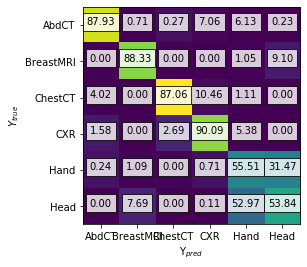

In [39]:
plt.imshow(conf.T/np.sum(conf))
classes = ['AbdCT', 'BreastMRI', 'ChestCT', 'CXR', 'Hand', 'Head']
plt.ylabel('$Y_{true}$')
plt.xlabel('Y$_{pred}$')
plt.xticks(np.arange(n_classes), classes)
plt.yticks(np.arange(n_classes), classes)
for i in range(conf.shape[0]):
    for j in range(conf.shape[1]):
        plt.text(j, i, "{:0.2f}".format(float((conf[i][j]/np.sum(conf[j]))*100)), horizontalalignment='center', bbox = dict(facecolor='white',alpha=0.8))

In [40]:

diag = np.arange(n_classes)
acc = np.sum(conf[diag, diag])/np.sum(conf)*100

print('Accuracy = {:0.2f}'.format(acc))

#per class precision, recall
P = []
R = []
F = []
for i in range(n_classes):
    P.append(conf_[i,i]/np.sum(conf_[i,:]))
    R.append(conf_[i,i]/np.sum(conf_[:,i]))
    F.append(2*P[i]*R[i]/(P[i] + R[i]))
    print('{}: p = {:0.3f}, r = {:0.3f}, f = {:0.3f}'.format(classes[i], P[i]*100, R[i]*100, F[i]*100))
macro_f = sum(F)/len(F)
print('Macro-F1 score = {:0.3f}'.format(macro_f*100))

Accuracy = 77.46
AbdCT: p = 93.766, r = 87.925, f = 90.752
BreastMRI: p = 90.296, r = 88.325, f = 89.300
ChestCT: p = 96.712, r = 87.058, f = 91.632
CXR: p = 83.081, r = 90.088, f = 86.442
Hand: p = 45.441, r = 55.507, f = 49.972
Head: p = 56.885, r = 53.835, f = 55.318
Macro-F1 score = 77.236


In [36]:
#without normalization and h =1
acc = (C1[0,0] + C1[1,1]+ C1[2,2]+ C1[3,3]+ C1[4,4]+ C1[5,5])/np.sum(C1)
acc

0.7745547073791349

## Gaussian

In [164]:
def pdf_multivariate_gauss_multiclass(x, mu, cov, det_cov, inv_cov):
    assert(mu.shape[0] > mu.shape[1])
    assert(x.shape[0] > x.shape[1])
    assert(cov.shape[0] == cov.shape[1])
    assert(mu.shape[0] == cov.shape[0])
    assert(mu.shape[0] == x.shape[0])
    part1 = 1 / ( ((2* np.pi)**(len(mu)/2)) * (det_cov**(1/2)) )
    part2 = (-1/2) * ((x-mu).T.dot(inv_cov)).dot((x-mu))
    return float(part1 * np.exp(part2))

In [175]:
#Gaussian_kernel_and_window_function
def gaussian_window_function_multi(cov, x, x_i, det_cov, inv_cov):
    assert (x.shape == x_i.shape)
    assert(cov.shape[0] == cov.shape[1])
    assert(x_i.shape[0] == cov.shape[0])
    assert(inv_cov.shape[0] == inv_cov.shape[1])
    assert(x_i.shape[0] == inv_cov.shape[0])
    return pdf_multivariate_gauss_multiclass(x, x_i,cov, det_cov, inv_cov)


#Estimation
def parzen_estimation_for_gaussian_multi(x_samples, point_x, cov, det_cov, inv_cov):
    dim = x_samples.shape[1]
    point_x = point_x.reshape((dim,1))
    prob = 0.0
    for row in x_samples:
        row = row.reshape((dim,1))
        prob += gaussian_window_function_multi(cov,point_x,row, det_cov,inv_cov)
    return prob 

In [176]:
#calculation of posterior
def posterior_multi(data_train, data, P,cov, det_cov, inv_cov):
    prob = np.zeros(no_of_classes, dtype = np.float64)
    class_probabilities  = np.zeros(no_of_classes)
    features = 20
    for i in range(no_of_classes):
        X_train = data_train["X_"+str(i)]
        class_probabilities[i] = parzen_estimation_for_gaussian_multi(X_train, data,cov,det_cov, inv_cov )
    #print(probabilities)
    for i in range(no_of_classes):
        prob[i] = class_probabilities[i]*P[i]
    return prob

In [177]:
def prediction_gaussian(data, X_train, cov,det_cov, inv_cov):
    Y = X_train[:,20].reshape(X_train.shape[0])
    P = prior_multi_class((Y), no_of_classes)
    data_train = separate(X_train, 6)
    Probabilities = posterior_multi(data_train, data, P, cov, det_cov, inv_cov)
    Probabilities = Probabilities/sum(Probabilities)
    #print(Probabilities)
    return np.argmax(Probabilities)

In [178]:
cov = np.eye(X_train.shape[1],dtype = np.float)
det_cov = np.linalg.det(cov)
inv_cov = np.linalg.inv(cov)

In [179]:
#computing accuracy on test data.
from tqdm import tqdm
C = np.zeros((no_of_classes,no_of_classes)) #[[]]
for cc in tqdm(range(no_of_classes)):
    X_ts = data_test["X_"+str(cc)]
    for i in tqdm(range((X_ts.shape[0]))):
        y_pred = prediction_gaussian(X_ts[i], X_train , cov, det_cov , inv_cov )
        C[y_pred, cc] += 1


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/2039 [00:00<?, ?it/s]E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


  0%|          | 1/2039 [00:00<20:07,  1.69it/s]

  0%|          | 2/2039 [00:01<18:44,  1.81it/s]

  0%|          | 3/2039 [00:01<17:56,  1.89it/s]

  0%|          | 4/2039 [00:01<17:09,  1.98it/s]

  0%|          | 5/2039 [00:02<16:40,  2.03it/s]

  0%|          | 6/2039 [00:02<16:22,  2.07it/s]

  0%|          | 7/2039 [00:03<15:53,  2.13it/s]

  0%|          | 8/2039 [00:03<15:34,  2.17it/s]

  0%|          | 9/2039 [00:04<15:21,  2.20it/s]

  0%|          | 10/2039 [00:04<15:12,  2.22it/s]

  1%|          | 11/2039 [00:05<15:06,  2.24it/s]

  1%|          | 12/2039 [00:05<15:09,  2.23it/s]

  1%|          | 13/2039 [00:06<15:25,  2.19it/s]

  1%|          | 14/2039 [00:06<15:26,  2.19it/s]

  1%|          | 15/2039 [00:06<15:18,  2.20it/s]

  1%|          | 16/2039 [00:07<15:09,  2.22it/

 14%|█▍        | 281/2039 [02:08<13:34,  2.16it/s]

 14%|█▍        | 282/2039 [02:09<13:51,  2.11it/s]

 14%|█▍        | 283/2039 [02:09<13:54,  2.10it/s]

 14%|█▍        | 284/2039 [02:10<13:42,  2.13it/s]

 14%|█▍        | 285/2039 [02:10<13:35,  2.15it/s]

 14%|█▍        | 286/2039 [02:11<13:36,  2.15it/s]

 14%|█▍        | 287/2039 [02:11<13:22,  2.18it/s]

 14%|█▍        | 288/2039 [02:12<13:15,  2.20it/s]

 14%|█▍        | 289/2039 [02:12<13:17,  2.19it/s]

 14%|█▍        | 290/2039 [02:12<13:11,  2.21it/s]

 14%|█▍        | 291/2039 [02:13<13:09,  2.21it/s]

 14%|█▍        | 292/2039 [02:13<13:06,  2.22it/s]

 14%|█▍        | 293/2039 [02:14<13:05,  2.22it/s]

 14%|█▍        | 294/2039 [02:14<13:08,  2.21it/s]

 14%|█▍        | 295/2039 [02:15<13:03,  2.23it/s]

 15%|█▍        | 296/2039 [02:15<13:02,  2.23it/s]

 15%|█▍        | 297/2039 [02:16<12:59,  2.24it/s]

 15%|█▍        | 298/2039 [02:16<13:01,  2.23it/s]

 15%|█▍        | 299/2039 [02:17<12:59,  2.23it/s]

 15%|█▍     

 28%|██▊       | 563/2039 [04:19<11:38,  2.11it/s]

 28%|██▊       | 564/2039 [04:19<11:30,  2.14it/s]

 28%|██▊       | 565/2039 [04:20<11:15,  2.18it/s]

 28%|██▊       | 566/2039 [04:20<11:24,  2.15it/s]

 28%|██▊       | 567/2039 [04:20<11:15,  2.18it/s]

 28%|██▊       | 568/2039 [04:21<11:08,  2.20it/s]

 28%|██▊       | 569/2039 [04:21<11:15,  2.17it/s]

 28%|██▊       | 570/2039 [04:22<11:12,  2.18it/s]

 28%|██▊       | 571/2039 [04:22<11:13,  2.18it/s]

 28%|██▊       | 572/2039 [04:23<11:06,  2.20it/s]

 28%|██▊       | 573/2039 [04:23<11:09,  2.19it/s]

 28%|██▊       | 574/2039 [04:24<11:10,  2.18it/s]

 28%|██▊       | 575/2039 [04:24<11:15,  2.17it/s]

 28%|██▊       | 576/2039 [04:25<11:10,  2.18it/s]

 28%|██▊       | 577/2039 [04:25<11:02,  2.21it/s]

 28%|██▊       | 578/2039 [04:25<10:56,  2.22it/s]

 28%|██▊       | 579/2039 [04:26<10:56,  2.22it/s]

 28%|██▊       | 580/2039 [04:26<10:58,  2.21it/s]

 28%|██▊       | 581/2039 [04:27<11:09,  2.18it/s]

 29%|██▊    

 41%|████▏     | 845/2039 [06:31<09:14,  2.16it/s]

 41%|████▏     | 846/2039 [06:31<09:16,  2.14it/s]

 42%|████▏     | 847/2039 [06:32<09:16,  2.14it/s]

 42%|████▏     | 848/2039 [06:32<09:34,  2.07it/s]

 42%|████▏     | 849/2039 [06:33<09:26,  2.10it/s]

 42%|████▏     | 850/2039 [06:33<09:15,  2.14it/s]

 42%|████▏     | 851/2039 [06:34<09:23,  2.11it/s]

 42%|████▏     | 852/2039 [06:34<09:16,  2.13it/s]

 42%|████▏     | 853/2039 [06:35<09:22,  2.11it/s]

 42%|████▏     | 854/2039 [06:35<09:23,  2.10it/s]

 42%|████▏     | 855/2039 [06:36<09:18,  2.12it/s]

 42%|████▏     | 856/2039 [06:36<09:16,  2.12it/s]

 42%|████▏     | 857/2039 [06:37<09:08,  2.15it/s]

 42%|████▏     | 858/2039 [06:37<09:08,  2.15it/s]

 42%|████▏     | 859/2039 [06:38<08:59,  2.19it/s]

 42%|████▏     | 860/2039 [06:38<09:14,  2.13it/s]

 42%|████▏     | 861/2039 [06:39<09:05,  2.16it/s]

 42%|████▏     | 862/2039 [06:39<09:02,  2.17it/s]

 42%|████▏     | 863/2039 [06:39<09:04,  2.16it/s]

 42%|████▏  

 55%|█████▌    | 1125/2039 [08:43<06:55,  2.20it/s]

 55%|█████▌    | 1126/2039 [08:43<06:53,  2.21it/s]

 55%|█████▌    | 1127/2039 [08:44<06:49,  2.23it/s]

 55%|█████▌    | 1128/2039 [08:44<06:45,  2.24it/s]

 55%|█████▌    | 1129/2039 [08:45<06:53,  2.20it/s]

 55%|█████▌    | 1130/2039 [08:45<06:50,  2.22it/s]

 55%|█████▌    | 1131/2039 [08:46<06:49,  2.22it/s]

 56%|█████▌    | 1132/2039 [08:46<06:47,  2.23it/s]

 56%|█████▌    | 1133/2039 [08:46<06:44,  2.24it/s]

 56%|█████▌    | 1134/2039 [08:47<06:41,  2.26it/s]

 56%|█████▌    | 1135/2039 [08:47<06:40,  2.26it/s]

 56%|█████▌    | 1136/2039 [08:48<06:53,  2.18it/s]

 56%|█████▌    | 1137/2039 [08:48<07:02,  2.14it/s]

 56%|█████▌    | 1138/2039 [08:49<07:13,  2.08it/s]

 56%|█████▌    | 1139/2039 [08:49<07:08,  2.10it/s]

 56%|█████▌    | 1140/2039 [08:50<07:08,  2.10it/s]

 56%|█████▌    | 1141/2039 [08:50<07:00,  2.14it/s]

 56%|█████▌    | 1142/2039 [08:51<06:54,  2.17it/s]

 56%|█████▌    | 1143/2039 [08:51<06:52,  2.17

 69%|██████▊   | 1401/2039 [10:55<05:40,  1.88it/s]

 69%|██████▉   | 1402/2039 [10:55<05:41,  1.87it/s]

 69%|██████▉   | 1403/2039 [10:56<05:40,  1.87it/s]

 69%|██████▉   | 1404/2039 [10:56<05:32,  1.91it/s]

 69%|██████▉   | 1405/2039 [10:57<05:23,  1.96it/s]

 69%|██████▉   | 1406/2039 [10:57<05:28,  1.93it/s]

 69%|██████▉   | 1407/2039 [10:58<05:30,  1.91it/s]

 69%|██████▉   | 1408/2039 [10:58<05:24,  1.94it/s]

 69%|██████▉   | 1409/2039 [10:59<05:14,  2.00it/s]

 69%|██████▉   | 1410/2039 [10:59<05:07,  2.05it/s]

 69%|██████▉   | 1411/2039 [11:00<05:00,  2.09it/s]

 69%|██████▉   | 1412/2039 [11:00<04:57,  2.11it/s]

 69%|██████▉   | 1413/2039 [11:01<04:58,  2.10it/s]

 69%|██████▉   | 1414/2039 [11:01<05:04,  2.05it/s]

 69%|██████▉   | 1415/2039 [11:02<04:58,  2.09it/s]

 69%|██████▉   | 1416/2039 [11:02<05:03,  2.06it/s]

 69%|██████▉   | 1417/2039 [11:02<04:55,  2.10it/s]

 70%|██████▉   | 1418/2039 [11:03<04:56,  2.09it/s]

 70%|██████▉   | 1419/2039 [11:03<04:49,  2.14

 82%|████████▏ | 1677/2039 [13:12<02:50,  2.12it/s]

 82%|████████▏ | 1678/2039 [13:12<02:53,  2.09it/s]

 82%|████████▏ | 1679/2039 [13:13<02:52,  2.09it/s]

 82%|████████▏ | 1680/2039 [13:13<02:50,  2.11it/s]

 82%|████████▏ | 1681/2039 [13:14<02:46,  2.15it/s]

 82%|████████▏ | 1682/2039 [13:14<02:51,  2.09it/s]

 83%|████████▎ | 1683/2039 [13:15<02:47,  2.12it/s]

 83%|████████▎ | 1684/2039 [13:15<02:44,  2.15it/s]

 83%|████████▎ | 1685/2039 [13:16<02:54,  2.02it/s]

 83%|████████▎ | 1686/2039 [13:16<02:55,  2.01it/s]

 83%|████████▎ | 1687/2039 [13:17<02:56,  1.99it/s]

 83%|████████▎ | 1688/2039 [13:17<02:50,  2.06it/s]

 83%|████████▎ | 1689/2039 [13:18<02:49,  2.07it/s]

 83%|████████▎ | 1690/2039 [13:18<02:52,  2.02it/s]

 83%|████████▎ | 1691/2039 [13:19<02:54,  1.99it/s]

 83%|████████▎ | 1692/2039 [13:19<02:51,  2.02it/s]

 83%|████████▎ | 1693/2039 [13:20<02:52,  2.00it/s]

 83%|████████▎ | 1694/2039 [13:20<02:54,  1.98it/s]

 83%|████████▎ | 1695/2039 [13:21<02:49,  2.02

 96%|█████████▌| 1953/2039 [15:30<00:41,  2.08it/s]

 96%|█████████▌| 1954/2039 [15:31<00:40,  2.10it/s]

 96%|█████████▌| 1955/2039 [15:31<00:39,  2.14it/s]

 96%|█████████▌| 1956/2039 [15:32<00:39,  2.11it/s]

 96%|█████████▌| 1957/2039 [15:32<00:37,  2.16it/s]

 96%|█████████▌| 1958/2039 [15:33<00:37,  2.17it/s]

 96%|█████████▌| 1959/2039 [15:33<00:37,  2.15it/s]

 96%|█████████▌| 1960/2039 [15:34<00:36,  2.16it/s]

 96%|█████████▌| 1961/2039 [15:34<00:35,  2.20it/s]

 96%|█████████▌| 1962/2039 [15:35<00:35,  2.19it/s]

 96%|█████████▋| 1963/2039 [15:35<00:34,  2.21it/s]

 96%|█████████▋| 1964/2039 [15:35<00:34,  2.19it/s]

 96%|█████████▋| 1965/2039 [15:36<00:34,  2.12it/s]

 96%|█████████▋| 1966/2039 [15:36<00:34,  2.13it/s]

 96%|█████████▋| 1967/2039 [15:37<00:33,  2.14it/s]

 97%|█████████▋| 1968/2039 [15:37<00:32,  2.16it/s]

 97%|█████████▋| 1969/2039 [15:38<00:31,  2.20it/s]

 97%|█████████▋| 1970/2039 [15:38<00:31,  2.20it/s]

 97%|█████████▋| 1971/2039 [15:39<00:30,  2.20

 11%|█         | 194/1801 [05:30<47:39,  1.78s/it]

 11%|█         | 195/1801 [05:32<49:06,  1.83s/it]

 11%|█         | 196/1801 [05:34<52:13,  1.95s/it]

 11%|█         | 197/1801 [05:36<51:56,  1.94s/it]

 11%|█         | 198/1801 [05:38<51:35,  1.93s/it]

 11%|█         | 199/1801 [05:40<49:01,  1.84s/it]

 11%|█         | 200/1801 [05:41<47:57,  1.80s/it]

 11%|█         | 201/1801 [05:44<52:00,  1.95s/it]

 11%|█         | 202/1801 [05:46<52:54,  1.99s/it]

 11%|█▏        | 203/1801 [05:48<52:14,  1.96s/it]

 11%|█▏        | 204/1801 [05:50<50:30,  1.90s/it]

 11%|█▏        | 205/1801 [05:51<50:21,  1.89s/it]

 11%|█▏        | 206/1801 [05:53<48:08,  1.81s/it]

 11%|█▏        | 207/1801 [05:55<49:59,  1.88s/it]

 12%|█▏        | 208/1801 [05:57<48:05,  1.81s/it]

 12%|█▏        | 209/1801 [05:58<47:36,  1.79s/it]

 12%|█▏        | 210/1801 [06:00<48:27,  1.83s/it]

 12%|█▏        | 211/1801 [06:02<48:20,  1.82s/it]

 12%|█▏        | 212/1801 [06:04<49:09,  1.86s/it]

 12%|█▏     

 26%|██▋       | 476/1801 [14:28<42:46,  1.94s/it]

 26%|██▋       | 477/1801 [14:30<41:29,  1.88s/it]

 27%|██▋       | 478/1801 [14:32<41:18,  1.87s/it]

 27%|██▋       | 479/1801 [14:33<39:44,  1.80s/it]

 27%|██▋       | 480/1801 [14:35<39:53,  1.81s/it]

 27%|██▋       | 481/1801 [14:37<40:43,  1.85s/it]

 27%|██▋       | 482/1801 [14:39<41:37,  1.89s/it]

 27%|██▋       | 483/1801 [14:41<41:42,  1.90s/it]

 27%|██▋       | 484/1801 [14:43<42:51,  1.95s/it]

 27%|██▋       | 485/1801 [14:45<40:50,  1.86s/it]

 27%|██▋       | 486/1801 [14:47<40:25,  1.84s/it]

 27%|██▋       | 487/1801 [14:48<41:06,  1.88s/it]

 27%|██▋       | 488/1801 [14:50<41:41,  1.91s/it]

 27%|██▋       | 489/1801 [14:52<42:30,  1.94s/it]

 27%|██▋       | 490/1801 [14:54<41:47,  1.91s/it]

 27%|██▋       | 491/1801 [14:56<41:43,  1.91s/it]

 27%|██▋       | 492/1801 [14:58<43:03,  1.97s/it]

 27%|██▋       | 493/1801 [15:00<39:44,  1.82s/it]

 27%|██▋       | 494/1801 [15:02<40:08,  1.84s/it]

 27%|██▋    

 42%|████▏     | 758/1801 [22:36<26:35,  1.53s/it]

 42%|████▏     | 759/1801 [22:38<26:26,  1.52s/it]

 42%|████▏     | 760/1801 [22:39<25:52,  1.49s/it]

 42%|████▏     | 761/1801 [22:41<26:06,  1.51s/it]

 42%|████▏     | 762/1801 [22:42<27:51,  1.61s/it]

 42%|████▏     | 763/1801 [22:44<26:26,  1.53s/it]

 42%|████▏     | 764/1801 [22:45<26:21,  1.53s/it]

 42%|████▏     | 765/1801 [22:47<26:54,  1.56s/it]

 43%|████▎     | 766/1801 [22:49<29:40,  1.72s/it]

 43%|████▎     | 767/1801 [22:51<30:47,  1.79s/it]

 43%|████▎     | 768/1801 [22:52<29:11,  1.70s/it]

 43%|████▎     | 769/1801 [22:54<29:06,  1.69s/it]

 43%|████▎     | 770/1801 [22:56<32:01,  1.86s/it]

 43%|████▎     | 771/1801 [22:59<35:21,  2.06s/it]

 43%|████▎     | 772/1801 [23:02<39:19,  2.29s/it]

 43%|████▎     | 773/1801 [23:04<40:07,  2.34s/it]

 43%|████▎     | 774/1801 [23:07<44:45,  2.61s/it]

 43%|████▎     | 775/1801 [23:11<47:40,  2.79s/it]

 43%|████▎     | 776/1801 [23:14<49:32,  2.90s/it]

 43%|████▎  

 58%|█████▊    | 1039/1801 [31:27<23:11,  1.83s/it]

 58%|█████▊    | 1040/1801 [31:29<22:56,  1.81s/it]

 58%|█████▊    | 1041/1801 [31:31<23:17,  1.84s/it]

 58%|█████▊    | 1042/1801 [31:33<22:02,  1.74s/it]

 58%|█████▊    | 1043/1801 [31:35<23:43,  1.88s/it]

 58%|█████▊    | 1044/1801 [31:37<24:35,  1.95s/it]

 58%|█████▊    | 1045/1801 [31:39<25:07,  1.99s/it]

 58%|█████▊    | 1046/1801 [31:41<25:22,  2.02s/it]

 58%|█████▊    | 1047/1801 [31:43<25:16,  2.01s/it]

 58%|█████▊    | 1048/1801 [31:45<25:53,  2.06s/it]

 58%|█████▊    | 1049/1801 [31:47<25:21,  2.02s/it]

 58%|█████▊    | 1050/1801 [31:49<24:26,  1.95s/it]

 58%|█████▊    | 1051/1801 [31:51<24:55,  1.99s/it]

 58%|█████▊    | 1052/1801 [31:53<25:05,  2.01s/it]

 58%|█████▊    | 1053/1801 [31:55<25:23,  2.04s/it]

 59%|█████▊    | 1054/1801 [31:57<25:27,  2.05s/it]

 59%|█████▊    | 1055/1801 [31:59<25:27,  2.05s/it]

 59%|█████▊    | 1056/1801 [32:01<25:38,  2.06s/it]

 59%|█████▊    | 1057/1801 [32:03<24:55,  2.01

 73%|███████▎  | 1315/1801 [39:36<13:38,  1.68s/it]

 73%|███████▎  | 1316/1801 [39:38<13:48,  1.71s/it]

 73%|███████▎  | 1317/1801 [39:39<13:39,  1.69s/it]

 73%|███████▎  | 1318/1801 [39:41<13:36,  1.69s/it]

 73%|███████▎  | 1319/1801 [39:43<13:47,  1.72s/it]

 73%|███████▎  | 1320/1801 [39:44<13:26,  1.68s/it]

 73%|███████▎  | 1321/1801 [39:46<13:46,  1.72s/it]

 73%|███████▎  | 1322/1801 [39:48<13:22,  1.68s/it]

 73%|███████▎  | 1323/1801 [39:50<13:28,  1.69s/it]

 74%|███████▎  | 1324/1801 [39:51<13:06,  1.65s/it]

 74%|███████▎  | 1325/1801 [39:53<13:56,  1.76s/it]

 74%|███████▎  | 1326/1801 [39:55<13:50,  1.75s/it]

 74%|███████▎  | 1327/1801 [39:57<13:49,  1.75s/it]

 74%|███████▎  | 1328/1801 [39:58<13:47,  1.75s/it]

 74%|███████▍  | 1329/1801 [40:00<14:25,  1.83s/it]

 74%|███████▍  | 1330/1801 [40:02<14:10,  1.81s/it]

 74%|███████▍  | 1331/1801 [40:04<13:32,  1.73s/it]

 74%|███████▍  | 1332/1801 [40:05<13:23,  1.71s/it]

 74%|███████▍  | 1333/1801 [40:07<13:10,  1.69

 88%|████████▊ | 1591/1801 [47:53<06:30,  1.86s/it]

 88%|████████▊ | 1592/1801 [47:55<06:33,  1.89s/it]

 88%|████████▊ | 1593/1801 [47:57<06:04,  1.75s/it]

 89%|████████▊ | 1594/1801 [47:58<05:58,  1.73s/it]

 89%|████████▊ | 1595/1801 [48:00<05:49,  1.70s/it]

 89%|████████▊ | 1596/1801 [48:02<06:04,  1.78s/it]

 89%|████████▊ | 1597/1801 [48:04<06:04,  1.79s/it]

 89%|████████▊ | 1598/1801 [48:05<05:53,  1.74s/it]

 89%|████████▉ | 1599/1801 [48:07<05:50,  1.73s/it]

 89%|████████▉ | 1600/1801 [48:08<05:37,  1.68s/it]

 89%|████████▉ | 1601/1801 [48:10<05:28,  1.64s/it]

 89%|████████▉ | 1602/1801 [48:12<05:20,  1.61s/it]

 89%|████████▉ | 1603/1801 [48:13<05:29,  1.66s/it]

 89%|████████▉ | 1604/1801 [48:15<05:21,  1.63s/it]

 89%|████████▉ | 1605/1801 [48:17<05:21,  1.64s/it]

 89%|████████▉ | 1606/1801 [48:18<05:34,  1.72s/it]

 89%|████████▉ | 1607/1801 [48:20<05:20,  1.65s/it]

 89%|████████▉ | 1608/1801 [48:22<05:16,  1.64s/it]

 89%|████████▉ | 1609/1801 [48:24<05:52,  1.84

  3%|▎         | 65/1947 [02:12<48:09,  1.54s/it]

  3%|▎         | 66/1947 [02:14<49:01,  1.56s/it]

  3%|▎         | 67/1947 [02:16<50:41,  1.62s/it]

  3%|▎         | 68/1947 [02:18<56:26,  1.80s/it]

  4%|▎         | 69/1947 [02:20<1:00:46,  1.94s/it]

  4%|▎         | 70/1947 [02:22<1:04:25,  2.06s/it]

  4%|▎         | 71/1947 [02:25<1:07:22,  2.16s/it]

  4%|▎         | 72/1947 [02:27<1:08:31,  2.19s/it]

  4%|▎         | 73/1947 [02:29<1:10:30,  2.26s/it]

  4%|▍         | 74/1947 [02:31<1:06:21,  2.13s/it]

  4%|▍         | 75/1947 [02:33<1:02:02,  1.99s/it]

  4%|▍         | 76/1947 [02:35<1:02:02,  1.99s/it]

  4%|▍         | 77/1947 [02:37<1:00:51,  1.95s/it]

  4%|▍         | 78/1947 [02:38<58:40,  1.88s/it]  

  4%|▍         | 79/1947 [02:40<59:33,  1.91s/it]

  4%|▍         | 80/1947 [02:42<59:25,  1.91s/it]

  4%|▍         | 81/1947 [02:44<58:22,  1.88s/it]

  4%|▍         | 82/1947 [02:46<57:46,  1.86s/it]

  4%|▍         | 83/1947 [02:48<56:37,  1.82s/it]

  4%|▍     

 11%|█         | 205/1947 [06:40<48:51,  1.68s/it]

 11%|█         | 206/1947 [06:42<48:46,  1.68s/it]

 11%|█         | 207/1947 [06:44<48:51,  1.68s/it]

 11%|█         | 208/1947 [06:45<48:05,  1.66s/it]

 11%|█         | 209/1947 [06:47<48:56,  1.69s/it]

 11%|█         | 210/1947 [06:49<47:43,  1.65s/it]

 11%|█         | 211/1947 [06:50<47:19,  1.64s/it]

 11%|█         | 212/1947 [06:52<47:10,  1.63s/it]

 11%|█         | 213/1947 [06:53<47:58,  1.66s/it]

 11%|█         | 214/1947 [06:55<47:52,  1.66s/it]

 11%|█         | 215/1947 [06:57<48:33,  1.68s/it]

 11%|█         | 216/1947 [06:58<47:37,  1.65s/it]

 11%|█         | 217/1947 [07:00<46:42,  1.62s/it]

 11%|█         | 218/1947 [07:02<47:32,  1.65s/it]

 11%|█         | 219/1947 [07:04<49:01,  1.70s/it]

 11%|█▏        | 220/1947 [07:05<48:32,  1.69s/it]

 11%|█▏        | 221/1947 [07:07<49:31,  1.72s/it]

 11%|█▏        | 222/1947 [07:09<49:04,  1.71s/it]

 11%|█▏        | 223/1947 [07:10<48:00,  1.67s/it]

 12%|█▏     

 25%|██▌       | 487/1947 [15:12<41:58,  1.72s/it]

 25%|██▌       | 488/1947 [15:14<42:52,  1.76s/it]

 25%|██▌       | 489/1947 [15:16<44:04,  1.81s/it]

 25%|██▌       | 490/1947 [15:18<44:45,  1.84s/it]

 25%|██▌       | 491/1947 [15:20<45:08,  1.86s/it]

 25%|██▌       | 492/1947 [15:21<42:28,  1.75s/it]

 25%|██▌       | 493/1947 [15:23<42:23,  1.75s/it]

 25%|██▌       | 494/1947 [15:25<41:34,  1.72s/it]

 25%|██▌       | 495/1947 [15:26<40:31,  1.67s/it]

 25%|██▌       | 496/1947 [15:28<40:21,  1.67s/it]

 26%|██▌       | 497/1947 [15:29<38:43,  1.60s/it]

 26%|██▌       | 498/1947 [15:31<37:49,  1.57s/it]

 26%|██▌       | 499/1947 [15:32<37:25,  1.55s/it]

 26%|██▌       | 500/1947 [15:34<38:58,  1.62s/it]

 26%|██▌       | 501/1947 [15:36<39:48,  1.65s/it]

 26%|██▌       | 502/1947 [15:37<38:31,  1.60s/it]

 26%|██▌       | 503/1947 [15:39<39:52,  1.66s/it]

 26%|██▌       | 504/1947 [15:41<39:04,  1.62s/it]

 26%|██▌       | 505/1947 [15:42<38:46,  1.61s/it]

 26%|██▌    

 39%|███▉      | 769/1947 [23:25<33:58,  1.73s/it]

 40%|███▉      | 770/1947 [23:27<35:25,  1.81s/it]

 40%|███▉      | 771/1947 [23:29<35:44,  1.82s/it]

 40%|███▉      | 772/1947 [23:31<36:52,  1.88s/it]

 40%|███▉      | 773/1947 [23:32<36:35,  1.87s/it]

 40%|███▉      | 774/1947 [23:34<34:06,  1.75s/it]

 40%|███▉      | 775/1947 [23:36<35:00,  1.79s/it]

 40%|███▉      | 776/1947 [23:38<34:46,  1.78s/it]

 40%|███▉      | 777/1947 [23:39<34:00,  1.74s/it]

 40%|███▉      | 778/1947 [23:41<33:03,  1.70s/it]

 40%|████      | 779/1947 [23:42<33:04,  1.70s/it]

 40%|████      | 780/1947 [23:44<32:13,  1.66s/it]

 40%|████      | 781/1947 [23:46<31:37,  1.63s/it]

 40%|████      | 782/1947 [23:47<31:19,  1.61s/it]

 40%|████      | 783/1947 [23:49<33:28,  1.73s/it]

 40%|████      | 784/1947 [23:51<34:59,  1.81s/it]

 40%|████      | 785/1947 [23:53<33:55,  1.75s/it]

 40%|████      | 786/1947 [23:54<32:46,  1.69s/it]

 40%|████      | 787/1947 [23:56<31:49,  1.65s/it]

 40%|████   

 54%|█████▍    | 1050/1947 [31:42<24:12,  1.62s/it]

 54%|█████▍    | 1051/1947 [31:44<23:43,  1.59s/it]

 54%|█████▍    | 1052/1947 [31:46<24:17,  1.63s/it]

 54%|█████▍    | 1053/1947 [31:47<24:47,  1.66s/it]

 54%|█████▍    | 1054/1947 [31:49<24:19,  1.63s/it]

 54%|█████▍    | 1055/1947 [31:51<24:05,  1.62s/it]

 54%|█████▍    | 1056/1947 [31:52<24:16,  1.63s/it]

 54%|█████▍    | 1057/1947 [31:54<23:55,  1.61s/it]

 54%|█████▍    | 1058/1947 [31:55<23:33,  1.59s/it]

 54%|█████▍    | 1059/1947 [31:57<24:05,  1.63s/it]

 54%|█████▍    | 1060/1947 [31:59<24:03,  1.63s/it]

 54%|█████▍    | 1061/1947 [32:00<24:20,  1.65s/it]

 55%|█████▍    | 1062/1947 [32:02<24:28,  1.66s/it]

 55%|█████▍    | 1063/1947 [32:04<24:11,  1.64s/it]

 55%|█████▍    | 1064/1947 [32:05<23:35,  1.60s/it]

 55%|█████▍    | 1065/1947 [32:07<23:55,  1.63s/it]

 55%|█████▍    | 1066/1947 [32:08<23:29,  1.60s/it]

 55%|█████▍    | 1067/1947 [32:10<24:16,  1.65s/it]

 55%|█████▍    | 1068/1947 [32:12<24:54,  1.70

 68%|██████▊   | 1326/1947 [39:05<04:54,  2.11it/s]

 68%|██████▊   | 1327/1947 [39:05<04:59,  2.07it/s]

 68%|██████▊   | 1328/1947 [39:06<05:04,  2.03it/s]

 68%|██████▊   | 1329/1947 [39:06<05:07,  2.01it/s]

 68%|██████▊   | 1330/1947 [39:07<05:19,  1.93it/s]

 68%|██████▊   | 1331/1947 [39:08<05:21,  1.91it/s]

 68%|██████▊   | 1332/1947 [39:08<05:12,  1.97it/s]

 68%|██████▊   | 1333/1947 [39:08<05:05,  2.01it/s]

 69%|██████▊   | 1334/1947 [39:09<05:00,  2.04it/s]

 69%|██████▊   | 1335/1947 [39:09<04:53,  2.09it/s]

 69%|██████▊   | 1336/1947 [39:10<04:59,  2.04it/s]

 69%|██████▊   | 1337/1947 [39:10<05:03,  2.01it/s]

 69%|██████▊   | 1338/1947 [39:11<05:06,  1.98it/s]

 69%|██████▉   | 1339/1947 [39:11<04:58,  2.04it/s]

 69%|██████▉   | 1340/1947 [39:12<04:52,  2.08it/s]

 69%|██████▉   | 1341/1947 [39:12<04:53,  2.06it/s]

 69%|██████▉   | 1342/1947 [39:13<04:51,  2.08it/s]

 69%|██████▉   | 1343/1947 [39:13<04:44,  2.12it/s]

 69%|██████▉   | 1344/1947 [39:14<04:40,  2.15

 82%|████████▏ | 1602/1947 [41:11<02:34,  2.24it/s]

 82%|████████▏ | 1603/1947 [41:11<02:34,  2.23it/s]

 82%|████████▏ | 1604/1947 [41:12<02:35,  2.21it/s]

 82%|████████▏ | 1605/1947 [41:12<02:33,  2.23it/s]

 82%|████████▏ | 1606/1947 [41:13<02:31,  2.25it/s]

 83%|████████▎ | 1607/1947 [41:13<02:30,  2.26it/s]

 83%|████████▎ | 1608/1947 [41:13<02:29,  2.26it/s]

 83%|████████▎ | 1609/1947 [41:14<02:30,  2.25it/s]

 83%|████████▎ | 1610/1947 [41:14<02:29,  2.26it/s]

 83%|████████▎ | 1611/1947 [41:15<02:28,  2.26it/s]

 83%|████████▎ | 1612/1947 [41:15<02:29,  2.24it/s]

 83%|████████▎ | 1613/1947 [41:16<02:28,  2.25it/s]

 83%|████████▎ | 1614/1947 [41:16<02:28,  2.24it/s]

 83%|████████▎ | 1615/1947 [41:17<02:28,  2.24it/s]

 83%|████████▎ | 1616/1947 [41:17<02:28,  2.23it/s]

 83%|████████▎ | 1617/1947 [41:17<02:27,  2.23it/s]

 83%|████████▎ | 1618/1947 [41:18<02:27,  2.23it/s]

 83%|████████▎ | 1619/1947 [41:18<02:27,  2.22it/s]

 83%|████████▎ | 1620/1947 [41:19<02:26,  2.23

 96%|█████████▋| 1878/1947 [43:17<00:32,  2.15it/s]

 97%|█████████▋| 1879/1947 [43:17<00:31,  2.17it/s]

 97%|█████████▋| 1880/1947 [43:18<00:30,  2.19it/s]

 97%|█████████▋| 1881/1947 [43:18<00:30,  2.19it/s]

 97%|█████████▋| 1882/1947 [43:19<00:30,  2.12it/s]

 97%|█████████▋| 1883/1947 [43:19<00:29,  2.15it/s]

 97%|█████████▋| 1884/1947 [43:20<00:30,  2.07it/s]

 97%|█████████▋| 1885/1947 [43:20<00:29,  2.10it/s]

 97%|█████████▋| 1886/1947 [43:20<00:28,  2.15it/s]

 97%|█████████▋| 1887/1947 [43:21<00:27,  2.19it/s]

 97%|█████████▋| 1888/1947 [43:21<00:26,  2.20it/s]

 97%|█████████▋| 1889/1947 [43:22<00:26,  2.21it/s]

 97%|█████████▋| 1890/1947 [43:22<00:25,  2.22it/s]

 97%|█████████▋| 1891/1947 [43:23<00:25,  2.22it/s]

 97%|█████████▋| 1892/1947 [43:23<00:24,  2.22it/s]

 97%|█████████▋| 1893/1947 [43:24<00:24,  2.21it/s]

 97%|█████████▋| 1894/1947 [43:24<00:23,  2.22it/s]

 97%|█████████▋| 1895/1947 [43:24<00:23,  2.22it/s]

 97%|█████████▋| 1896/1947 [43:25<00:22,  2.22

 11%|█         | 211/1967 [01:40<14:15,  2.05it/s]

 11%|█         | 212/1967 [01:41<14:22,  2.03it/s]

 11%|█         | 213/1967 [01:41<14:03,  2.08it/s]

 11%|█         | 214/1967 [01:41<13:50,  2.11it/s]

 11%|█         | 215/1967 [01:42<13:48,  2.12it/s]

 11%|█         | 216/1967 [01:42<13:46,  2.12it/s]

 11%|█         | 217/1967 [01:43<13:49,  2.11it/s]

 11%|█         | 218/1967 [01:43<13:39,  2.13it/s]

 11%|█         | 219/1967 [01:44<13:34,  2.15it/s]

 11%|█         | 220/1967 [01:44<13:32,  2.15it/s]

 11%|█         | 221/1967 [01:45<13:46,  2.11it/s]

 11%|█▏        | 222/1967 [01:45<13:50,  2.10it/s]

 11%|█▏        | 223/1967 [01:46<13:49,  2.10it/s]

 11%|█▏        | 224/1967 [01:46<13:35,  2.14it/s]

 11%|█▏        | 225/1967 [01:47<13:28,  2.15it/s]

 11%|█▏        | 226/1967 [01:47<13:30,  2.15it/s]

 12%|█▏        | 227/1967 [01:48<13:46,  2.10it/s]

 12%|█▏        | 228/1967 [01:48<13:55,  2.08it/s]

 12%|█▏        | 229/1967 [01:49<14:10,  2.04it/s]

 12%|█▏     

 25%|██▌       | 493/1967 [03:55<11:37,  2.11it/s]

 25%|██▌       | 494/1967 [03:56<11:28,  2.14it/s]

 25%|██▌       | 495/1967 [03:56<11:26,  2.15it/s]

 25%|██▌       | 496/1967 [03:57<11:22,  2.15it/s]

 25%|██▌       | 497/1967 [03:57<11:17,  2.17it/s]

 25%|██▌       | 498/1967 [03:58<11:29,  2.13it/s]

 25%|██▌       | 499/1967 [03:58<11:22,  2.15it/s]

 25%|██▌       | 500/1967 [03:58<11:22,  2.15it/s]

 25%|██▌       | 501/1967 [03:59<11:27,  2.13it/s]

 26%|██▌       | 502/1967 [03:59<11:31,  2.12it/s]

 26%|██▌       | 503/1967 [04:00<11:41,  2.09it/s]

 26%|██▌       | 504/1967 [04:00<11:46,  2.07it/s]

 26%|██▌       | 505/1967 [04:01<11:46,  2.07it/s]

 26%|██▌       | 506/1967 [04:01<11:55,  2.04it/s]

 26%|██▌       | 507/1967 [04:02<11:42,  2.08it/s]

 26%|██▌       | 508/1967 [04:02<11:47,  2.06it/s]

 26%|██▌       | 509/1967 [04:03<11:37,  2.09it/s]

 26%|██▌       | 510/1967 [04:03<11:28,  2.12it/s]

 26%|██▌       | 511/1967 [04:04<11:39,  2.08it/s]

 26%|██▌    

 39%|███▉      | 775/1967 [06:10<09:48,  2.02it/s]

 39%|███▉      | 776/1967 [06:11<09:58,  1.99it/s]

 40%|███▉      | 777/1967 [06:11<09:45,  2.03it/s]

 40%|███▉      | 778/1967 [06:12<09:50,  2.01it/s]

 40%|███▉      | 779/1967 [06:12<09:59,  1.98it/s]

 40%|███▉      | 780/1967 [06:13<09:45,  2.03it/s]

 40%|███▉      | 781/1967 [06:13<09:47,  2.02it/s]

 40%|███▉      | 782/1967 [06:13<09:27,  2.09it/s]

 40%|███▉      | 783/1967 [06:14<09:22,  2.11it/s]

 40%|███▉      | 784/1967 [06:14<09:15,  2.13it/s]

 40%|███▉      | 785/1967 [06:15<09:08,  2.16it/s]

 40%|███▉      | 786/1967 [06:15<09:24,  2.09it/s]

 40%|████      | 787/1967 [06:16<10:35,  1.86it/s]

 40%|████      | 788/1967 [06:17<10:47,  1.82it/s]

 40%|████      | 789/1967 [06:17<10:39,  1.84it/s]

 40%|████      | 790/1967 [06:18<10:10,  1.93it/s]

 40%|████      | 791/1967 [06:18<09:58,  1.96it/s]

 40%|████      | 792/1967 [06:19<09:53,  1.98it/s]

 40%|████      | 793/1967 [06:19<09:44,  2.01it/s]

 40%|████   

 54%|█████▎    | 1056/1967 [08:26<07:19,  2.07it/s]

 54%|█████▎    | 1057/1967 [08:27<07:19,  2.07it/s]

 54%|█████▍    | 1058/1967 [08:27<07:21,  2.06it/s]

 54%|█████▍    | 1059/1967 [08:28<07:19,  2.07it/s]

 54%|█████▍    | 1060/1967 [08:28<07:17,  2.08it/s]

 54%|█████▍    | 1061/1967 [08:29<07:24,  2.04it/s]

 54%|█████▍    | 1062/1967 [08:29<07:25,  2.03it/s]

 54%|█████▍    | 1063/1967 [08:30<07:23,  2.04it/s]

 54%|█████▍    | 1064/1967 [08:30<07:17,  2.06it/s]

 54%|█████▍    | 1065/1967 [08:30<07:12,  2.09it/s]

 54%|█████▍    | 1066/1967 [08:31<07:11,  2.09it/s]

 54%|█████▍    | 1067/1967 [08:31<07:11,  2.08it/s]

 54%|█████▍    | 1068/1967 [08:32<07:08,  2.10it/s]

 54%|█████▍    | 1069/1967 [08:32<07:19,  2.04it/s]

 54%|█████▍    | 1070/1967 [08:33<07:26,  2.01it/s]

 54%|█████▍    | 1071/1967 [08:33<07:21,  2.03it/s]

 54%|█████▍    | 1072/1967 [08:34<07:32,  1.98it/s]

 55%|█████▍    | 1073/1967 [08:34<07:35,  1.96it/s]

 55%|█████▍    | 1074/1967 [08:35<07:24,  2.01

 68%|██████▊   | 1332/1967 [10:40<05:10,  2.04it/s]

 68%|██████▊   | 1333/1967 [10:41<05:10,  2.04it/s]

 68%|██████▊   | 1334/1967 [10:41<05:16,  2.00it/s]

 68%|██████▊   | 1335/1967 [10:42<05:13,  2.02it/s]

 68%|██████▊   | 1336/1967 [10:42<05:19,  1.97it/s]

 68%|██████▊   | 1337/1967 [10:43<05:11,  2.02it/s]

 68%|██████▊   | 1338/1967 [10:43<05:04,  2.06it/s]

 68%|██████▊   | 1339/1967 [10:44<04:58,  2.11it/s]

 68%|██████▊   | 1340/1967 [10:44<05:04,  2.06it/s]

 68%|██████▊   | 1341/1967 [10:45<05:04,  2.05it/s]

 68%|██████▊   | 1342/1967 [10:45<05:01,  2.08it/s]

 68%|██████▊   | 1343/1967 [10:46<05:03,  2.06it/s]

 68%|██████▊   | 1344/1967 [10:46<05:00,  2.08it/s]

 68%|██████▊   | 1345/1967 [10:47<05:02,  2.06it/s]

 68%|██████▊   | 1346/1967 [10:47<05:03,  2.05it/s]

 68%|██████▊   | 1347/1967 [10:48<04:58,  2.08it/s]

 69%|██████▊   | 1348/1967 [10:48<04:59,  2.07it/s]

 69%|██████▊   | 1349/1967 [10:49<05:00,  2.06it/s]

 69%|██████▊   | 1350/1967 [10:49<05:03,  2.03

 82%|████████▏ | 1608/1967 [12:55<02:52,  2.08it/s]

 82%|████████▏ | 1609/1967 [12:55<02:50,  2.10it/s]

 82%|████████▏ | 1610/1967 [12:56<02:50,  2.09it/s]

 82%|████████▏ | 1611/1967 [12:56<02:50,  2.09it/s]

 82%|████████▏ | 1612/1967 [12:57<02:50,  2.08it/s]

 82%|████████▏ | 1613/1967 [12:57<02:49,  2.09it/s]

 82%|████████▏ | 1614/1967 [12:58<02:52,  2.05it/s]

 82%|████████▏ | 1615/1967 [12:58<02:52,  2.04it/s]

 82%|████████▏ | 1616/1967 [12:58<02:46,  2.11it/s]

 82%|████████▏ | 1617/1967 [12:59<02:47,  2.09it/s]

 82%|████████▏ | 1618/1967 [12:59<02:49,  2.06it/s]

 82%|████████▏ | 1619/1967 [13:00<02:46,  2.09it/s]

 82%|████████▏ | 1620/1967 [13:00<02:47,  2.07it/s]

 82%|████████▏ | 1621/1967 [13:01<02:47,  2.07it/s]

 82%|████████▏ | 1622/1967 [13:01<02:44,  2.10it/s]

 83%|████████▎ | 1623/1967 [13:02<02:45,  2.08it/s]

 83%|████████▎ | 1624/1967 [13:02<02:41,  2.13it/s]

 83%|████████▎ | 1625/1967 [13:03<02:39,  2.15it/s]

 83%|████████▎ | 1626/1967 [13:03<02:42,  2.10

 96%|█████████▌| 1884/1967 [15:09<00:38,  2.16it/s]

 96%|█████████▌| 1885/1967 [15:10<00:38,  2.14it/s]

 96%|█████████▌| 1886/1967 [15:10<00:37,  2.16it/s]

 96%|█████████▌| 1887/1967 [15:11<00:36,  2.17it/s]

 96%|█████████▌| 1888/1967 [15:11<00:36,  2.14it/s]

 96%|█████████▌| 1889/1967 [15:12<00:37,  2.11it/s]

 96%|█████████▌| 1890/1967 [15:12<00:36,  2.08it/s]

 96%|█████████▌| 1891/1967 [15:13<00:36,  2.06it/s]

 96%|█████████▌| 1892/1967 [15:13<00:36,  2.04it/s]

 96%|█████████▌| 1893/1967 [15:14<00:36,  2.03it/s]

 96%|█████████▋| 1894/1967 [15:14<00:36,  2.00it/s]

 96%|█████████▋| 1895/1967 [15:15<00:35,  2.01it/s]

 96%|█████████▋| 1896/1967 [15:15<00:34,  2.04it/s]

 96%|█████████▋| 1897/1967 [15:16<00:34,  2.05it/s]

 96%|█████████▋| 1898/1967 [15:16<00:33,  2.06it/s]

 97%|█████████▋| 1899/1967 [15:17<00:34,  1.97it/s]

 97%|█████████▋| 1900/1967 [15:17<00:33,  2.01it/s]

 97%|█████████▋| 1901/1967 [15:18<00:33,  1.99it/s]

 97%|█████████▋| 1902/1967 [15:18<00:32,  2.00

 10%|▉         | 198/2018 [01:33<14:50,  2.04it/s]

 10%|▉         | 199/2018 [01:34<14:34,  2.08it/s]

 10%|▉         | 200/2018 [01:34<14:34,  2.08it/s]

 10%|▉         | 201/2018 [01:35<14:30,  2.09it/s]

 10%|█         | 202/2018 [01:35<14:44,  2.05it/s]

 10%|█         | 203/2018 [01:36<15:02,  2.01it/s]

 10%|█         | 204/2018 [01:36<15:18,  1.98it/s]

 10%|█         | 205/2018 [01:37<15:25,  1.96it/s]

 10%|█         | 206/2018 [01:37<15:16,  1.98it/s]

 10%|█         | 207/2018 [01:38<15:02,  2.01it/s]

 10%|█         | 208/2018 [01:38<14:38,  2.06it/s]

 10%|█         | 209/2018 [01:39<14:26,  2.09it/s]

 10%|█         | 210/2018 [01:39<14:14,  2.12it/s]

 10%|█         | 211/2018 [01:39<14:27,  2.08it/s]

 11%|█         | 212/2018 [01:40<14:12,  2.12it/s]

 11%|█         | 213/2018 [01:40<14:16,  2.11it/s]

 11%|█         | 214/2018 [01:41<14:07,  2.13it/s]

 11%|█         | 215/2018 [01:41<14:01,  2.14it/s]

 11%|█         | 216/2018 [01:42<13:54,  2.16it/s]

 11%|█      

 24%|██▍       | 480/2018 [03:46<11:48,  2.17it/s]

 24%|██▍       | 481/2018 [03:46<11:57,  2.14it/s]

 24%|██▍       | 482/2018 [03:47<11:54,  2.15it/s]

 24%|██▍       | 483/2018 [03:47<11:55,  2.14it/s]

 24%|██▍       | 484/2018 [03:47<12:00,  2.13it/s]

 24%|██▍       | 485/2018 [03:48<12:05,  2.11it/s]

 24%|██▍       | 486/2018 [03:48<11:49,  2.16it/s]

 24%|██▍       | 487/2018 [03:49<11:47,  2.16it/s]

 24%|██▍       | 488/2018 [03:49<11:45,  2.17it/s]

 24%|██▍       | 489/2018 [03:50<11:35,  2.20it/s]

 24%|██▍       | 490/2018 [03:50<11:38,  2.19it/s]

 24%|██▍       | 491/2018 [03:51<11:43,  2.17it/s]

 24%|██▍       | 492/2018 [03:51<11:39,  2.18it/s]

 24%|██▍       | 493/2018 [03:52<11:34,  2.20it/s]

 24%|██▍       | 494/2018 [03:52<11:35,  2.19it/s]

 25%|██▍       | 495/2018 [03:52<11:27,  2.22it/s]

 25%|██▍       | 496/2018 [03:53<11:23,  2.23it/s]

 25%|██▍       | 497/2018 [03:53<11:32,  2.20it/s]

 25%|██▍       | 498/2018 [03:54<11:38,  2.18it/s]

 25%|██▍    

 38%|███▊      | 762/2018 [06:00<12:51,  1.63it/s]

 38%|███▊      | 763/2018 [06:00<12:30,  1.67it/s]

 38%|███▊      | 764/2018 [06:01<11:46,  1.77it/s]

 38%|███▊      | 765/2018 [06:01<11:28,  1.82it/s]

 38%|███▊      | 766/2018 [06:02<11:06,  1.88it/s]

 38%|███▊      | 767/2018 [06:02<10:42,  1.95it/s]

 38%|███▊      | 768/2018 [06:03<10:17,  2.02it/s]

 38%|███▊      | 769/2018 [06:03<09:57,  2.09it/s]

 38%|███▊      | 770/2018 [06:03<10:06,  2.06it/s]

 38%|███▊      | 771/2018 [06:04<10:06,  2.06it/s]

 38%|███▊      | 772/2018 [06:04<10:12,  2.04it/s]

 38%|███▊      | 773/2018 [06:05<10:13,  2.03it/s]

 38%|███▊      | 774/2018 [06:06<10:50,  1.91it/s]

 38%|███▊      | 775/2018 [06:06<10:38,  1.95it/s]

 38%|███▊      | 776/2018 [06:06<10:09,  2.04it/s]

 39%|███▊      | 777/2018 [06:07<09:51,  2.10it/s]

 39%|███▊      | 778/2018 [06:07<09:41,  2.13it/s]

 39%|███▊      | 779/2018 [06:08<09:35,  2.15it/s]

 39%|███▊      | 780/2018 [06:08<09:38,  2.14it/s]

 39%|███▊   

 52%|█████▏    | 1043/2018 [08:11<07:32,  2.15it/s]

 52%|█████▏    | 1044/2018 [08:11<07:46,  2.09it/s]

 52%|█████▏    | 1045/2018 [08:12<07:48,  2.08it/s]

 52%|█████▏    | 1046/2018 [08:12<07:48,  2.07it/s]

 52%|█████▏    | 1047/2018 [08:13<07:49,  2.07it/s]

 52%|█████▏    | 1048/2018 [08:13<07:52,  2.05it/s]

 52%|█████▏    | 1049/2018 [08:14<07:41,  2.10it/s]

 52%|█████▏    | 1050/2018 [08:14<07:43,  2.09it/s]

 52%|█████▏    | 1051/2018 [08:15<07:37,  2.11it/s]

 52%|█████▏    | 1052/2018 [08:15<07:46,  2.07it/s]

 52%|█████▏    | 1053/2018 [08:16<07:40,  2.10it/s]

 52%|█████▏    | 1054/2018 [08:16<07:28,  2.15it/s]

 52%|█████▏    | 1055/2018 [08:16<07:31,  2.13it/s]

 52%|█████▏    | 1056/2018 [08:17<07:31,  2.13it/s]

 52%|█████▏    | 1057/2018 [08:17<07:22,  2.17it/s]

 52%|█████▏    | 1058/2018 [08:18<07:15,  2.20it/s]

 52%|█████▏    | 1059/2018 [08:18<07:21,  2.17it/s]

 53%|█████▎    | 1060/2018 [08:19<07:18,  2.19it/s]

 53%|█████▎    | 1061/2018 [08:19<07:25,  2.15

 65%|██████▌   | 1319/2018 [10:24<05:29,  2.12it/s]

 65%|██████▌   | 1320/2018 [10:25<05:28,  2.13it/s]

 65%|██████▌   | 1321/2018 [10:25<05:31,  2.10it/s]

 66%|██████▌   | 1322/2018 [10:26<05:26,  2.13it/s]

 66%|██████▌   | 1323/2018 [10:26<05:23,  2.15it/s]

 66%|██████▌   | 1324/2018 [10:26<05:26,  2.12it/s]

 66%|██████▌   | 1325/2018 [10:27<05:20,  2.16it/s]

 66%|██████▌   | 1326/2018 [10:27<05:23,  2.14it/s]

 66%|██████▌   | 1327/2018 [10:28<05:27,  2.11it/s]

 66%|██████▌   | 1328/2018 [10:28<05:22,  2.14it/s]

 66%|██████▌   | 1329/2018 [10:29<05:21,  2.14it/s]

 66%|██████▌   | 1330/2018 [10:29<05:21,  2.14it/s]

 66%|██████▌   | 1331/2018 [10:30<05:17,  2.16it/s]

 66%|██████▌   | 1332/2018 [10:30<05:18,  2.15it/s]

 66%|██████▌   | 1333/2018 [10:31<05:20,  2.14it/s]

 66%|██████▌   | 1334/2018 [10:31<05:20,  2.14it/s]

 66%|██████▌   | 1335/2018 [10:32<05:25,  2.10it/s]

 66%|██████▌   | 1336/2018 [10:32<05:26,  2.09it/s]

 66%|██████▋   | 1337/2018 [10:33<05:27,  2.08

 79%|███████▉  | 1595/2018 [12:36<03:28,  2.03it/s]

 79%|███████▉  | 1596/2018 [12:36<03:25,  2.05it/s]

 79%|███████▉  | 1597/2018 [12:37<03:27,  2.03it/s]

 79%|███████▉  | 1598/2018 [12:37<03:28,  2.01it/s]

 79%|███████▉  | 1599/2018 [12:38<03:30,  1.99it/s]

 79%|███████▉  | 1600/2018 [12:38<03:34,  1.95it/s]

 79%|███████▉  | 1601/2018 [12:39<03:29,  1.99it/s]

 79%|███████▉  | 1602/2018 [12:39<03:23,  2.05it/s]

 79%|███████▉  | 1603/2018 [12:40<03:23,  2.04it/s]

 79%|███████▉  | 1604/2018 [12:40<03:29,  1.97it/s]

 80%|███████▉  | 1605/2018 [12:41<03:27,  1.99it/s]

 80%|███████▉  | 1606/2018 [12:41<03:27,  1.98it/s]

 80%|███████▉  | 1607/2018 [12:42<03:23,  2.02it/s]

 80%|███████▉  | 1608/2018 [12:42<03:21,  2.03it/s]

 80%|███████▉  | 1609/2018 [12:43<03:18,  2.06it/s]

 80%|███████▉  | 1610/2018 [12:43<03:25,  1.99it/s]

 80%|███████▉  | 1611/2018 [12:44<03:22,  2.01it/s]

 80%|███████▉  | 1612/2018 [12:44<03:27,  1.96it/s]

 80%|███████▉  | 1613/2018 [12:45<03:27,  1.95

 93%|█████████▎| 1871/2018 [14:57<01:09,  2.12it/s]

 93%|█████████▎| 1872/2018 [14:57<01:09,  2.11it/s]

 93%|█████████▎| 1873/2018 [14:57<01:08,  2.10it/s]

 93%|█████████▎| 1874/2018 [14:58<01:07,  2.13it/s]

 93%|█████████▎| 1875/2018 [14:58<01:07,  2.12it/s]

 93%|█████████▎| 1876/2018 [14:59<01:06,  2.14it/s]

 93%|█████████▎| 1877/2018 [14:59<01:05,  2.16it/s]

 93%|█████████▎| 1878/2018 [15:00<01:04,  2.16it/s]

 93%|█████████▎| 1879/2018 [15:00<01:06,  2.08it/s]

 93%|█████████▎| 1880/2018 [15:01<01:06,  2.08it/s]

 93%|█████████▎| 1881/2018 [15:01<01:06,  2.08it/s]

 93%|█████████▎| 1882/2018 [15:02<01:04,  2.11it/s]

 93%|█████████▎| 1883/2018 [15:02<01:05,  2.07it/s]

 93%|█████████▎| 1884/2018 [15:03<01:04,  2.06it/s]

 93%|█████████▎| 1885/2018 [15:03<01:04,  2.07it/s]

 93%|█████████▎| 1886/2018 [15:04<01:03,  2.07it/s]

 94%|█████████▎| 1887/2018 [15:04<01:04,  2.02it/s]

 94%|█████████▎| 1888/2018 [15:05<01:03,  2.05it/s]

 94%|█████████▎| 1889/2018 [15:05<01:02,  2.07

  7%|▋         | 132/2018 [01:07<15:48,  1.99it/s]

  7%|▋         | 133/2018 [01:07<15:28,  2.03it/s]

  7%|▋         | 134/2018 [01:08<15:25,  2.04it/s]

  7%|▋         | 135/2018 [01:08<15:19,  2.05it/s]

  7%|▋         | 136/2018 [01:09<15:08,  2.07it/s]

  7%|▋         | 137/2018 [01:09<14:56,  2.10it/s]

  7%|▋         | 138/2018 [01:10<14:49,  2.11it/s]

  7%|▋         | 139/2018 [01:10<14:46,  2.12it/s]

  7%|▋         | 140/2018 [01:10<14:38,  2.14it/s]

  7%|▋         | 141/2018 [01:11<14:39,  2.14it/s]

  7%|▋         | 142/2018 [01:11<14:46,  2.12it/s]

  7%|▋         | 143/2018 [01:12<14:50,  2.10it/s]

  7%|▋         | 144/2018 [01:12<14:48,  2.11it/s]

  7%|▋         | 145/2018 [01:13<14:50,  2.10it/s]

  7%|▋         | 146/2018 [01:13<14:40,  2.13it/s]

  7%|▋         | 147/2018 [01:14<14:44,  2.12it/s]

  7%|▋         | 148/2018 [01:14<14:33,  2.14it/s]

  7%|▋         | 149/2018 [01:15<14:25,  2.16it/s]

  7%|▋         | 150/2018 [01:15<14:22,  2.17it/s]

  7%|▋      

 21%|██        | 414/2018 [03:20<12:52,  2.08it/s]

 21%|██        | 415/2018 [03:21<12:44,  2.10it/s]

 21%|██        | 416/2018 [03:21<12:53,  2.07it/s]

 21%|██        | 417/2018 [03:22<13:05,  2.04it/s]

 21%|██        | 418/2018 [03:22<12:58,  2.06it/s]

 21%|██        | 419/2018 [03:23<12:45,  2.09it/s]

 21%|██        | 420/2018 [03:23<12:43,  2.09it/s]

 21%|██        | 421/2018 [03:24<12:48,  2.08it/s]

 21%|██        | 422/2018 [03:24<12:43,  2.09it/s]

 21%|██        | 423/2018 [03:25<12:36,  2.11it/s]

 21%|██        | 424/2018 [03:25<12:19,  2.15it/s]

 21%|██        | 425/2018 [03:26<12:26,  2.13it/s]

 21%|██        | 426/2018 [03:26<12:30,  2.12it/s]

 21%|██        | 427/2018 [03:26<12:23,  2.14it/s]

 21%|██        | 428/2018 [03:27<12:27,  2.13it/s]

 21%|██▏       | 429/2018 [03:27<12:29,  2.12it/s]

 21%|██▏       | 430/2018 [03:28<12:17,  2.15it/s]

 21%|██▏       | 431/2018 [03:28<12:25,  2.13it/s]

 21%|██▏       | 432/2018 [03:29<12:17,  2.15it/s]

 21%|██▏    

 34%|███▍      | 696/2018 [05:39<10:42,  2.06it/s]

 35%|███▍      | 697/2018 [05:39<10:33,  2.09it/s]

 35%|███▍      | 698/2018 [05:39<10:35,  2.08it/s]

 35%|███▍      | 699/2018 [05:40<10:37,  2.07it/s]

 35%|███▍      | 700/2018 [05:40<10:38,  2.07it/s]

 35%|███▍      | 701/2018 [05:41<10:28,  2.10it/s]

 35%|███▍      | 702/2018 [05:41<10:21,  2.12it/s]

 35%|███▍      | 703/2018 [05:42<10:11,  2.15it/s]

 35%|███▍      | 704/2018 [05:42<10:22,  2.11it/s]

 35%|███▍      | 705/2018 [05:43<10:20,  2.11it/s]

 35%|███▍      | 706/2018 [05:43<10:35,  2.07it/s]

 35%|███▌      | 707/2018 [05:44<10:43,  2.04it/s]

 35%|███▌      | 708/2018 [05:44<10:54,  2.00it/s]

 35%|███▌      | 709/2018 [05:45<10:53,  2.00it/s]

 35%|███▌      | 710/2018 [05:45<10:39,  2.05it/s]

 35%|███▌      | 711/2018 [05:46<10:37,  2.05it/s]

 35%|███▌      | 712/2018 [05:46<10:33,  2.06it/s]

 35%|███▌      | 713/2018 [05:47<10:30,  2.07it/s]

 35%|███▌      | 714/2018 [05:47<10:25,  2.08it/s]

 35%|███▌   

 48%|████▊     | 978/2018 [08:06<08:30,  2.04it/s]

 49%|████▊     | 979/2018 [08:06<08:27,  2.05it/s]

 49%|████▊     | 980/2018 [08:07<08:15,  2.09it/s]

 49%|████▊     | 981/2018 [08:07<08:21,  2.07it/s]

 49%|████▊     | 982/2018 [08:08<08:44,  1.97it/s]

 49%|████▊     | 983/2018 [08:09<09:22,  1.84it/s]

 49%|████▉     | 984/2018 [08:09<08:59,  1.92it/s]

 49%|████▉     | 985/2018 [08:10<09:10,  1.88it/s]

 49%|████▉     | 986/2018 [08:10<08:48,  1.95it/s]

 49%|████▉     | 987/2018 [08:11<09:39,  1.78it/s]

 49%|████▉     | 988/2018 [08:11<09:44,  1.76it/s]

 49%|████▉     | 989/2018 [08:12<09:15,  1.85it/s]

 49%|████▉     | 990/2018 [08:12<08:50,  1.94it/s]

 49%|████▉     | 991/2018 [08:13<08:32,  2.00it/s]

 49%|████▉     | 992/2018 [08:13<08:19,  2.05it/s]

 49%|████▉     | 993/2018 [08:14<08:12,  2.08it/s]

 49%|████▉     | 994/2018 [08:14<08:08,  2.10it/s]

 49%|████▉     | 995/2018 [08:14<07:59,  2.13it/s]

 49%|████▉     | 996/2018 [08:15<08:01,  2.12it/s]

 49%|████▉  

 62%|██████▏   | 1255/2018 [10:19<06:36,  1.93it/s]

 62%|██████▏   | 1256/2018 [10:20<06:35,  1.93it/s]

 62%|██████▏   | 1257/2018 [10:20<06:29,  1.95it/s]

 62%|██████▏   | 1258/2018 [10:21<06:26,  1.97it/s]

 62%|██████▏   | 1259/2018 [10:21<06:19,  2.00it/s]

 62%|██████▏   | 1260/2018 [10:22<06:16,  2.01it/s]

 62%|██████▏   | 1261/2018 [10:22<06:12,  2.03it/s]

 63%|██████▎   | 1262/2018 [10:23<06:13,  2.02it/s]

 63%|██████▎   | 1263/2018 [10:23<06:23,  1.97it/s]

 63%|██████▎   | 1264/2018 [10:24<06:32,  1.92it/s]

 63%|██████▎   | 1265/2018 [10:24<06:37,  1.90it/s]

 63%|██████▎   | 1266/2018 [10:25<06:41,  1.87it/s]

 63%|██████▎   | 1267/2018 [10:25<06:44,  1.85it/s]

 63%|██████▎   | 1268/2018 [10:26<07:00,  1.78it/s]

 63%|██████▎   | 1269/2018 [10:27<07:14,  1.72it/s]

 63%|██████▎   | 1270/2018 [10:27<07:15,  1.72it/s]

 63%|██████▎   | 1271/2018 [10:28<07:15,  1.71it/s]

 63%|██████▎   | 1272/2018 [10:28<07:03,  1.76it/s]

 63%|██████▎   | 1273/2018 [10:29<06:54,  1.80

 76%|███████▌  | 1531/2018 [12:39<04:00,  2.03it/s]

 76%|███████▌  | 1532/2018 [12:39<03:56,  2.06it/s]

 76%|███████▌  | 1533/2018 [12:40<03:48,  2.12it/s]

 76%|███████▌  | 1534/2018 [12:40<03:44,  2.15it/s]

 76%|███████▌  | 1535/2018 [12:41<03:41,  2.18it/s]

 76%|███████▌  | 1536/2018 [12:41<03:41,  2.18it/s]

 76%|███████▌  | 1537/2018 [12:41<03:43,  2.15it/s]

 76%|███████▌  | 1538/2018 [12:42<03:41,  2.16it/s]

 76%|███████▋  | 1539/2018 [12:42<03:44,  2.13it/s]

 76%|███████▋  | 1540/2018 [12:43<03:44,  2.13it/s]

 76%|███████▋  | 1541/2018 [12:43<03:39,  2.17it/s]

 76%|███████▋  | 1542/2018 [12:44<03:41,  2.15it/s]

 76%|███████▋  | 1543/2018 [12:44<03:39,  2.17it/s]

 77%|███████▋  | 1544/2018 [12:45<03:38,  2.17it/s]

 77%|███████▋  | 1545/2018 [12:45<03:40,  2.15it/s]

 77%|███████▋  | 1546/2018 [12:46<03:40,  2.14it/s]

 77%|███████▋  | 1547/2018 [12:46<03:44,  2.10it/s]

 77%|███████▋  | 1548/2018 [12:47<03:55,  2.00it/s]

 77%|███████▋  | 1549/2018 [12:47<03:47,  2.06

 90%|████████▉ | 1807/2018 [14:53<01:47,  1.97it/s]

 90%|████████▉ | 1808/2018 [14:54<01:49,  1.92it/s]

 90%|████████▉ | 1809/2018 [14:54<01:49,  1.92it/s]

 90%|████████▉ | 1810/2018 [14:55<01:47,  1.93it/s]

 90%|████████▉ | 1811/2018 [14:55<01:49,  1.88it/s]

 90%|████████▉ | 1812/2018 [14:56<01:48,  1.91it/s]

 90%|████████▉ | 1813/2018 [14:56<01:46,  1.92it/s]

 90%|████████▉ | 1814/2018 [14:57<01:48,  1.88it/s]

 90%|████████▉ | 1815/2018 [14:57<01:48,  1.87it/s]

 90%|████████▉ | 1816/2018 [14:58<01:59,  1.69it/s]

 90%|█████████ | 1817/2018 [14:59<02:18,  1.45it/s]

 90%|█████████ | 1818/2018 [15:00<03:04,  1.09it/s]

 90%|█████████ | 1819/2018 [15:02<03:38,  1.10s/it]

 90%|█████████ | 1820/2018 [15:03<03:51,  1.17s/it]

 90%|█████████ | 1821/2018 [15:04<03:45,  1.14s/it]

 90%|█████████ | 1822/2018 [15:05<03:29,  1.07s/it]

 90%|█████████ | 1823/2018 [15:06<03:11,  1.02it/s]

 90%|█████████ | 1824/2018 [15:07<02:43,  1.19it/s]

 90%|█████████ | 1825/2018 [15:07<02:21,  1.36

In [180]:
#without normalization and h =1
acc = (C[0,0] + C[1,1]+ C[2,2]+ C[3,3]+ C[4,4]+ C[5,5])/np.sum(C)
acc

0.2340966921119593

In [181]:
C 

array([[2039., 1793., 1302., 1967., 2018., 1950.],
       [   0.,    8.,    0.,    0.,    0.,    0.],
       [   0.,    0.,  645.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,   68.]])

In [3]:
C = np.array([[2039., 1793., 1302., 1967., 2018., 1950.],
       [   0.,    8.,    0.,    0.,    0.,    0.],
       [   0.,    0.,  645.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,   68.]])

In [4]:
conf = C
conf_ = C.T

In [5]:
n_classes = 6

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


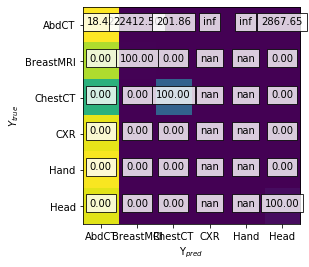

In [6]:
plt.imshow(conf.T/np.sum(conf))
classes = ['AbdCT', 'BreastMRI', 'ChestCT', 'CXR', 'Hand', 'Head']
plt.ylabel('$Y_{true}$')
plt.xlabel('Y$_{pred}$')
plt.xticks(np.arange(n_classes), classes)
plt.yticks(np.arange(n_classes), classes)
for i in range(conf.shape[0]):
    for j in range(conf.shape[1]):
        plt.text(j, i, "{:0.2f}".format(float((conf[i][j]/np.sum(conf[j]))*100)), horizontalalignment='center', bbox = dict(facecolor='white',alpha=0.8))

In [8]:

diag = np.arange(n_classes)
acc = np.sum(conf[diag, diag])/np.sum(conf)*100

print('Accuracy = {:0.2f}'.format(acc))

#per class precision, recall
P = []
R = []
F = []
for i in range(n_classes):
    P.append(conf_[i,i]/np.sum(conf_[i,:]))
    R.append(conf_[i,i]/np.sum(conf_[:,i]))
    F.append(2*P[i]*R[i]/(P[i] + R[i]))
    print('{}: p = {:0.3f}, r = {:0.3f}, f = {:0.3f}'.format(classes[i], P[i]*100, R[i]*100, F[i]*100))
macro_f = sum(F)/len(F)
print('Macro-F1 score = {:0.3f}'.format(macro_f*100))

Accuracy = 23.41
AbdCT: p = 100.000, r = 18.421, f = 31.111
BreastMRI: p = 0.444, r = 100.000, f = 0.884
ChestCT: p = 33.128, r = 100.000, f = 49.769
CXR: p = 0.000, r = nan, f = nan
Hand: p = 0.000, r = nan, f = nan
Head: p = 3.370, r = 100.000, f = 6.520
Macro-F1 score = nan


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
